# Import Necessary Packages

In [36]:
# General
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import time
from collections import Counter
import sys
import os
import datetime
from scipy.spatial.distance import hamming
import seaborn as sns

code_folder = os.getcwd()
path_to_functions = os.path.join(code_folder, '..')
sys.path.insert(0, path_to_functions)

import functions as funcs
import importlib
importlib.reload(funcs)

<module 'functions' from '/home/fahimeh/2023Arab_CaLLTiF/Simulated fMRI Causality/../functions.py'>

# Global Variables

In [37]:
# varlingam
alpha =[0.000001, 0.000005, 0.00001, 0.00005,0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04,0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

# dynotears
alpha_dynotears =[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09, 0.1]

# pcmci
# alpha_level_pcmci = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6,1e-5, 1e-4]
# alpha_level_pcmci = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
# pc_alpha = [0.8, 0.9, 1]
pc_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]   # this one is for the case where we tried with more pcalpha values for the paper
alpha_level_pcmci = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
# pc_alpha = [1.0]

calltif_alpha =  [1e-20, 1e-19,1e-18,1e-17,1e-16, 1e-15, 1e-14, 1e-13,1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#dglearn
bic_coef_all = [0.005, 0.01, 0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 0.9,1]

# pcmciplus
pc_alpha_pcmciplus = [1e-25,1e-24,1e-23,1e-22,1e-21,1e-21,1e-20,1e-18,1e-16,1e-14,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2]

# mvgc
mvgc_alpha = [0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5]
mvgc_lags = [1, 2, 3, 4, 5]

tau_max = 3
tau_min = 0

# macaque data
num_rep_macaque_all = 60
num_rep_macaque = 10

# Set the Path to External Packages and Files, Results, and Data

In [38]:
code_folder = os.getcwd()
files_folder = os.path.join(code_folder, '..', 'External Packages and Files')
results_folder = os.path.join(code_folder, '..', 'Results')
data_folder = os.path.join(code_folder, '..', 'Data')

# Macaque Small-Degree Graph

In [39]:
path_to_Macaque = path_to_Macaque = os.path.join(data_folder,"DataSets_Feedbacks/2_Macaque_Networks/SmallDegree/data_fslfilter_concat") 

num_nodes_macaque_small = 28
nodes_macaque_small = ['X%d'%i for i in range(1,num_nodes_macaque_small+1)]
macaque_all_data_small = [0]*num_rep_macaque_all

for i in range (1,num_rep_macaque_all + 1):
    if i <= 9:
        current_str = "0"+str(i)
    elif 10 <= i:
        current_str = str(i)

    data_concat  = pd.read_csv(path_to_Macaque+"/concat_BOLDfslfilter_"+current_str+".txt", delimiter = '\t').to_numpy()
    macaque_all_data_small[i-1] = data_concat
    

## Ground Truth Graph 

In [40]:
path_to_ground_truth =os.path.join(data_folder,'DataSets_Feedbacks/2_Macaque_Networks/SmallDegree/graph/')
filename = path_to_ground_truth + "Macaque_SmallDegree_graph.txt"
ground_truth_nodes_macaques_small, ground_truth_edges_macaques_small, ground_truth_graph_matrix_macaques_small, ground_truth_execution_time_macaques_small  = funcs.tetrad_graph_parser(filename, ground_truth = 1)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph_from_binary_matrix(binary_matrix, node_labels=None, node_colors=None, node_sizes=None, node_font_size=12, edge_color='black', edge_width=1.0, node_distance=1.0):
    G = nx.DiGraph()  # Use DiGraph for directed graph

    # Add nodes
    num_nodes = len(binary_matrix)
    G.add_nodes_from(range(num_nodes))

    # Add edges
    for i in range(num_nodes):
        for j in range(num_nodes):
            if binary_matrix[i][j] == 1:
                G.add_edge(i, j)

    # Set node colors
    if node_colors is None:
        node_colors = ['lightblue'] * num_nodes

    # Set node labels
    if node_labels is None:
        node_labels = [str(i) for i in range(num_nodes)]

    # Set node sizes
    if node_sizes is None:
        node_sizes = [300] * num_nodes

    # Set node font size
    node_font_sizes = {i: node_font_size for i in range(num_nodes)}

    # Set edge thickness
    edge_widths = [edge_width] * len(G.edges())

    # Fixed layout
    pos = nx.kamada_kawai_layout(G, scale=node_distance)

    # Plot graph
    nx.draw(G, pos, with_labels=False, 
            node_color=node_colors, node_size=node_sizes, font_size=node_font_size, edge_color=edge_color,
            width=edge_widths, arrowsize=20, font_weight='bold')


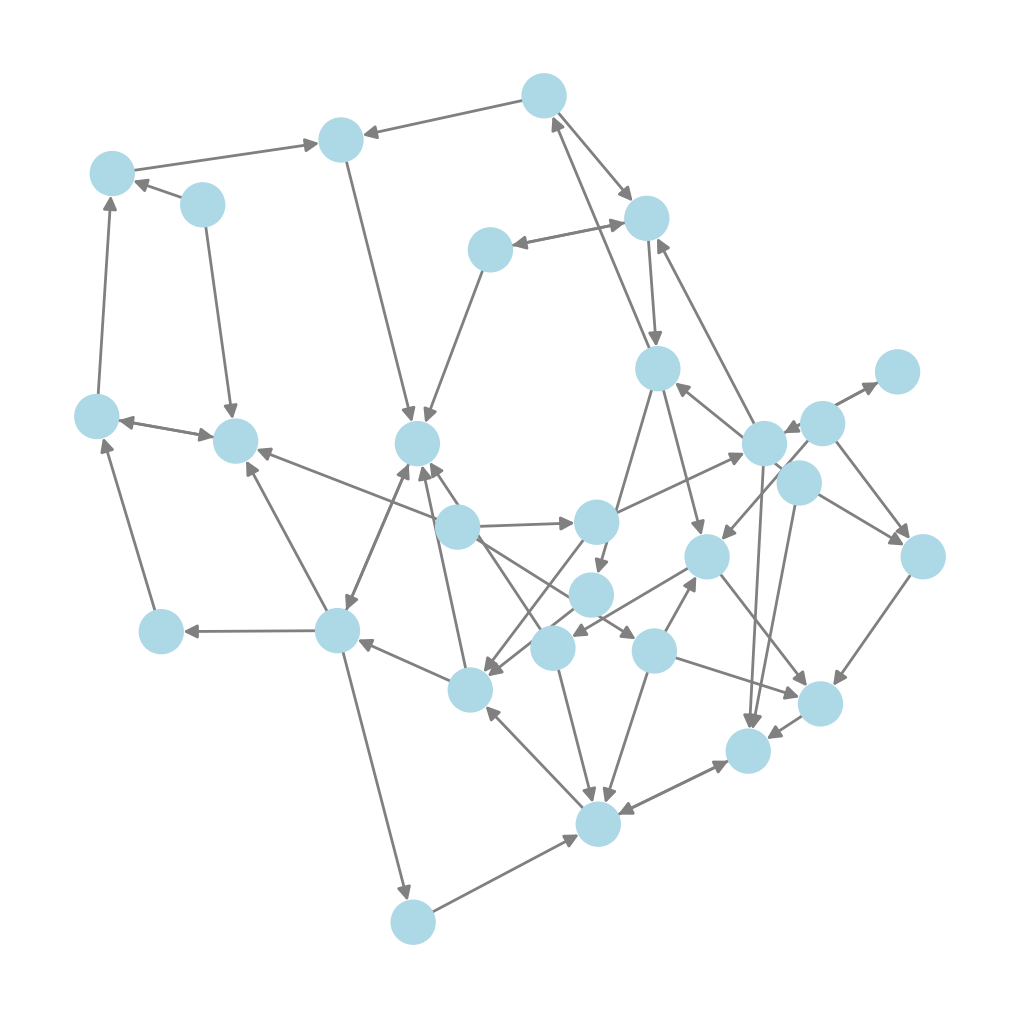

In [42]:
plt.figure(figsize = (10, 10))
  
plot_graph_from_binary_matrix(ground_truth_graph_matrix_macaques_small, node_labels=None, node_colors=None, node_sizes= 1000, node_font_size=44, edge_color='gray', edge_width=2.0)


# Causal Discovery Methods

## Load saved results

In [43]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle= True)
    print(Data)
    for varName in Data:
        globals()[varName] = Data[varName] 

In [44]:
# with max_lag = 3
import_npz(os.path.join(results_folder,'Varlingam_macaque_small_degree_sweep_alpha_lag_3.npz'))
# import_npz(os.path.join(results_folder,'PCMCI_macaque_small_degree_sweep_both_alpha.npz'))
import_npz(os.path.join(results_folder,'PCMCI_macaque_small_degree_sweep_both_alpha_lag_3_try_more_values_of_pc_alpha.npz'))
import_npz(os.path.join(results_folder,'Dynotears_macaque_small_degree_sweep_alpha_lag_3.npz'))
import_npz(os.path.join(results_folder,'MVGC_macaque_small_degree_sweep_both_parameters_all_reps.npz'))
import_npz(os.path.join(results_folder,'CaLLTiF_macaque_small_degree.npz'))

## PCMCI

### PCMCI Execution Time

In [45]:
num_rep_macaque_all = 10

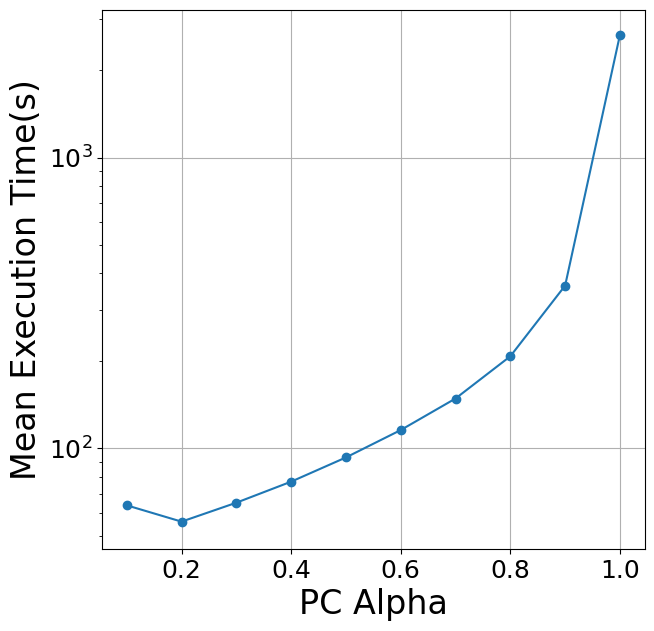

In [46]:
PCMCI_Mean_Exe_Time_Macaque = np.mean(np.array(pcmci_macaque_execution_time), axis = 0)
PCMCI_std_Exe_Time_Macaque= np.std(np.array(pcmci_macaque_execution_time), axis = 0)

markers = ['o-', '^-', 's-', '*-', 'd-', 'v-','+-','x-','<-']
plt.figure(figsize = (7,7))
plt.errorbar(pc_alpha, PCMCI_Mean_Exe_Time_Macaque,PCMCI_std_Exe_Time_Macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')

plt.yscale('log')
plt.xlabel('PC Alpha', fontsize = 24)
plt.ylabel('Mean Execution Time(s)', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid()

### Mixed-PCMCI

In [47]:
mixed_pcmci_adj_TPR_all_rep_macaque_both_alpha = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_adj_FPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]

mixed_pcmci_ori_TPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_ori_FPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]

macaque_ground_truth = ground_truth_graph_matrix_macaques_small

for r in range(0,num_rep_macaque_all):
    for a1 in range(0, len(pc_alpha)):
        for a2 in range(0, len(alpha_level_pcmci)):

            p_matrix = np.array(pcmci_pval_matrix_all_macaque[r][a1])
    
            # Threshold p_matrix to get graph
            final_graph_new = p_matrix <= alpha_level_pcmci[a2]
            
            # Convert to string graph representation
            graph = funcs.convert_to_string_graph(final_graph_new)

            summary_graph, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix = funcs.summarize_across_all_lags_v1(graph)
            adjacency_TPR, adjacency_FPR, adjacency_Recall, adjacency_Precision, adjacency_F1_score, orientation_TPR, orientation_FPR, orientation_Recall,orientation_Precision,orientation_F1_score = funcs.find_tpr_fpr_from_orientation_and_adjacency_matrices(macaque_ground_truth, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix)
            
            mixed_pcmci_adj_TPR_all_rep_macaque_both_alpha[r][a1][a2] = adjacency_TPR
            mixed_pcmci_adj_FPR_all_rep_macaque_both_alpha[r][a1][a2]  = adjacency_FPR
            mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha[r][a1][a2]  = adjacency_Recall
            mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha[r][a1][a2] = adjacency_Precision
            mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha[r][a1][a2] = adjacency_F1_score

            mixed_pcmci_ori_TPR_all_rep_macaque_both_alpha[r][a1][a2] = orientation_TPR
            mixed_pcmci_ori_FPR_all_rep_macaque_both_alpha[r][a1][a2]= orientation_FPR
            mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha[r][a1][a2] = orientation_Recall
            mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha[r][a1][a2]  = orientation_Precision
            mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha[r][a1][a2] = orientation_F1_score


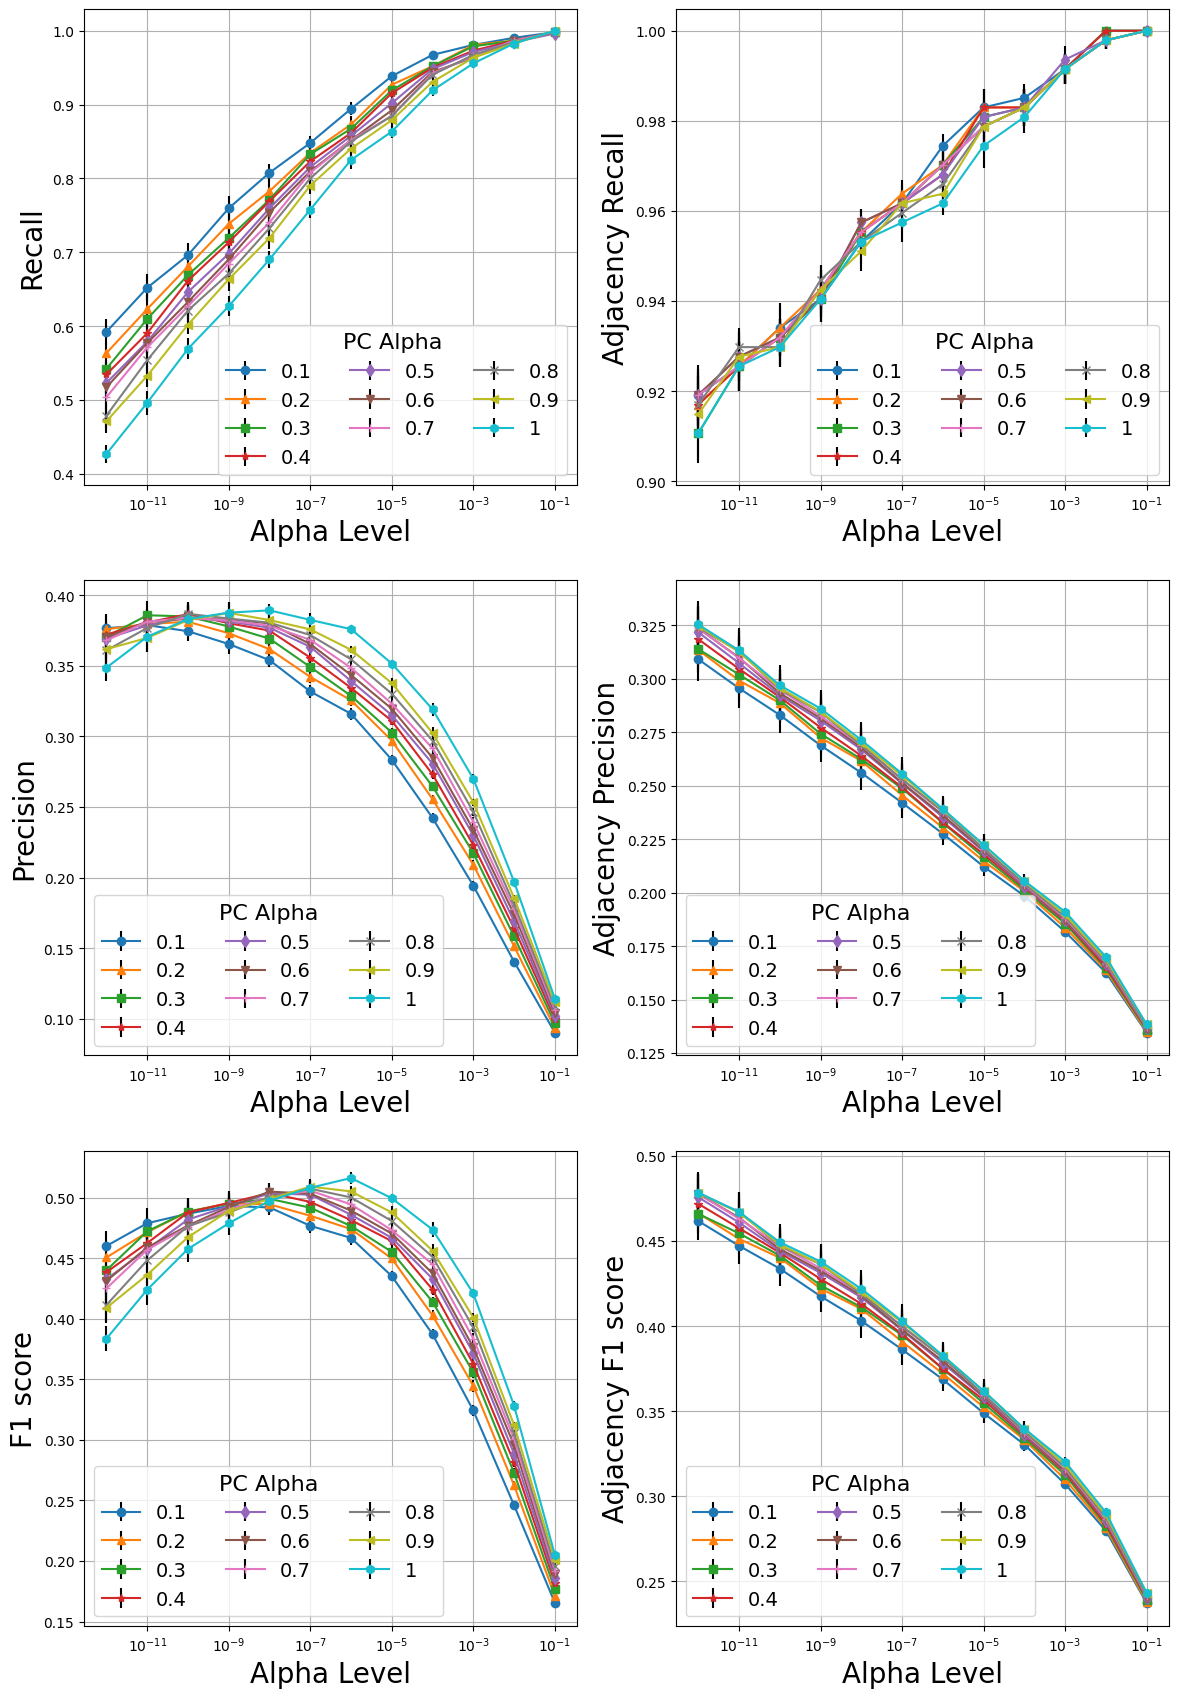

In [48]:
plt.figure(figsize = (14, 21))
markers = ['o-', '^-', 's-', '*-', 'd-', 'v-','+-','x-','<-', 'h-']


for k in range(0, len(pc_alpha)):

    mixed_pcmci_adj_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    mixed_pcmci_adj_precision_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    mixed_pcmci_adj_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_precision_median_macaque = np.zeros_like(alpha_level_pcmci) 

    mixed_pcmci_adj_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    mixed_pcmci_adj_F1_score_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci) 

    mixed_pcmci_ori_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    mixed_pcmci_ori_precision_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_precision_median_macaque = np.zeros_like(alpha_level_pcmci)

    mixed_pcmci_ori_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_F1_score_std_macaque =np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci)


    for a in range(0,len(alpha_level_pcmci)):

        mixed_pcmci_adj_recall_mean_macaque[a] = np.mean(np.array(mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_recall_std_macaque[a] = np.std(np.array(mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_recall_median_macaque[a] = np.median(np.array(mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])


        mixed_pcmci_adj_precision_mean_macaque[a] = np.mean(np.array(mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_precision_std_macaque[a] = np.std(np.array(mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_precision_median_macaque[a] = np.median(np.array(mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])


        mixed_pcmci_adj_F1_score_mean_macaque[a] = np.mean(np.array(mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_F1_score_std_macaque[a] = np.std(np.array(mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_F1_score_median_macaque[a] = np.median(np.array(mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])


        mixed_pcmci_ori_recall_mean_macaque[a] = np.mean(np.array(mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_recall_std_macaque[a] = np.std(np.array(mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_recall_median_macaque[a] = np.median(np.array(mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])


        mixed_pcmci_ori_precision_mean_macaque[a] = np.mean(np.array(mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_precision_std_macaque[a] = np.std(np.array(mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_precision_median_macaque[a] = np.median(np.array(mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])


        mixed_pcmci_ori_F1_score_mean_macaque[a] = np.mean(np.array(mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_F1_score_std_macaque[a] = np.std(np.array(mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_F1_score_median_macaque[a] = np.median(np.array(mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])

    mixed_pcmci_best_alpha_adj_mean= alpha_level_pcmci[np.argmax(mixed_pcmci_adj_F1_score_mean_macaque)]
    mixed_pcmci_best_alpha_adj_median = alpha_level_pcmci[np.argmax(mixed_pcmci_adj_F1_score_median_macaque)]
    mixed_pcmci_best_alpha_ori_mean = alpha_level_pcmci[np.argmax(mixed_pcmci_ori_F1_score_mean_macaque)]
    mixed_pcmci_best_alpha_ori_median = alpha_level_pcmci[np.argmax(mixed_pcmci_ori_F1_score_median_macaque)]

    plt.subplot(3,2,2)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_adj_recall_mean_macaque, mixed_pcmci_adj_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency Recall', fontsize = 20)
    plt.grid()
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,1)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_ori_recall_mean_macaque, mixed_pcmci_ori_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Recall', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,4)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_adj_precision_mean_macaque, mixed_pcmci_adj_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency Precision', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,3)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_ori_precision_mean_macaque, mixed_pcmci_ori_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Precision', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,6)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_adj_F1_score_mean_macaque, mixed_pcmci_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,5)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_ori_F1_score_mean_macaque, mixed_pcmci_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


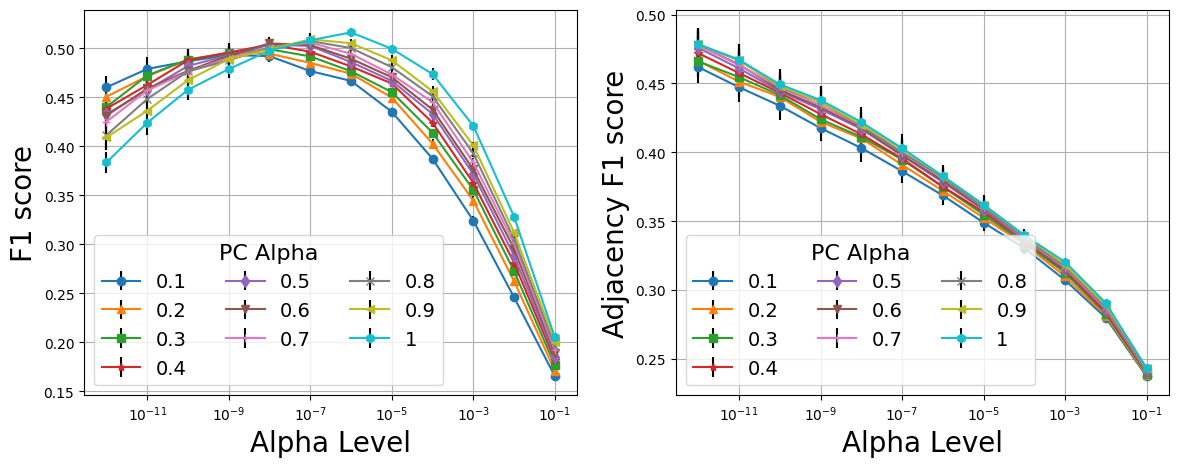

In [49]:
# Recall and Precision, and F1_score vs alpha for adjacency
plt.figure(figsize = (14, 5))
markers = ['o-', '^-', 's-', '*-', 'd-', 'v-','+-','x-','<-', 'h-']


for k in range(0, len(pc_alpha)):

    mixed_pcmci_adj_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    mixed_pcmci_adj_precision_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    mixed_pcmci_adj_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_precision_median_macaque = np.zeros_like(alpha_level_pcmci) 

    mixed_pcmci_adj_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    mixed_pcmci_adj_F1_score_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_adj_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci) 

    mixed_pcmci_ori_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    mixed_pcmci_ori_precision_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_precision_median_macaque = np.zeros_like(alpha_level_pcmci)

    mixed_pcmci_ori_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_F1_score_std_macaque =np.zeros_like(alpha_level_pcmci)
    mixed_pcmci_ori_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci)


    for a in range(0,len(alpha_level_pcmci)):

        mixed_pcmci_adj_recall_mean_macaque[a] = np.mean(np.array(mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_recall_std_macaque[a] = np.std(np.array(mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_recall_median_macaque[a] = np.median(np.array(mixed_pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])

        mixed_pcmci_adj_precision_mean_macaque[a] = np.mean(np.array(mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_precision_std_macaque[a] = np.std(np.array(mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_precision_median_macaque[a] = np.median(np.array(mixed_pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])

        mixed_pcmci_adj_F1_score_mean_macaque[a] = np.mean(np.array(mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_F1_score_std_macaque[a] = np.std(np.array(mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_adj_F1_score_median_macaque[a] = np.median(np.array(mixed_pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])

        mixed_pcmci_ori_recall_mean_macaque[a] = np.mean(np.array(mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_recall_std_macaque[a] = np.std(np.array(mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_recall_median_macaque[a] = np.median(np.array(mixed_pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])

        mixed_pcmci_ori_precision_mean_macaque[a] = np.mean(np.array(mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_precision_std_macaque[a] = np.std(np.array(mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_precision_median_macaque[a] = np.median(np.array(mixed_pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])

        mixed_pcmci_ori_F1_score_mean_macaque[a] = np.mean(np.array(mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_F1_score_std_macaque[a] = np.std(np.array(mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mixed_pcmci_ori_F1_score_median_macaque[a] = np.median(np.array(mixed_pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])

    mixed_pcmci_best_alpha_adj_mean= alpha_level_pcmci[np.argmax(mixed_pcmci_adj_F1_score_mean_macaque)]
    mixed_pcmci_best_alpha_adj_median = alpha_level_pcmci[np.argmax(mixed_pcmci_adj_F1_score_median_macaque)]
    mixed_pcmci_best_alpha_ori_mean = alpha_level_pcmci[np.argmax(mixed_pcmci_ori_F1_score_mean_macaque)]
    mixed_pcmci_best_alpha_ori_median = alpha_level_pcmci[np.argmax(mixed_pcmci_ori_F1_score_median_macaque)]


    plt.subplot(1,2,2)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_adj_F1_score_mean_macaque, mixed_pcmci_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(1,2,1)
    plt.errorbar(alpha_level_pcmci, mixed_pcmci_ori_F1_score_mean_macaque, mixed_pcmci_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


### PCMCI

In [50]:
pcmci_adj_TPR_all_rep_macaque_both_alpha = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_adj_FPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_adj_Recall_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_adj_Precision_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_adj_F1_score_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]

pcmci_ori_TPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_ori_FPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_ori_Recall_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_ori_Precision_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]
pcmci_ori_F1_score_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(alpha_level_pcmci))] for j in range(0,len(pc_alpha))] for i in range(0,num_rep_macaque_all )]

macaque_ground_truth = ground_truth_graph_matrix_macaques_small

for r in range(0,num_rep_macaque_all):
    for a1 in range(0, len(pc_alpha)):
        
        p_matrix = np.array(pcmci_pval_matrix_all_macaque[r][a1])

        for a2 in range(0, len(alpha_level_pcmci)):

    
            # Threshold p_matrix to get graph
            final_graph_new = p_matrix <= alpha_level_pcmci[a2]
            
            # Convert to string graph representation
            graph = funcs.convert_to_string_graph(final_graph_new)
            estimated_non_zero_lags_combined = funcs.summarize_across_nonzero_lags(graph)
            adjacency_TPR, adjacency_FPR, adjacency_Recall, adjacency_Precision, adjacency_F1_score, orientation_TPR, orientation_FPR, orientation_Recall,orientation_Precision,orientation_F1_score = funcs.find_tpr_fpr_from_binary_matrix(macaque_ground_truth, estimated_non_zero_lags_combined)

            pcmci_adj_TPR_all_rep_macaque_both_alpha[r][a1][a2] = adjacency_TPR
            pcmci_adj_FPR_all_rep_macaque_both_alpha[r][a1][a2]  = adjacency_FPR
            pcmci_adj_Recall_all_rep_macaque_both_alpha[r][a1][a2]  = adjacency_Recall
            pcmci_adj_Precision_all_rep_macaque_both_alpha[r][a1][a2] = adjacency_Precision
            pcmci_adj_F1_score_all_rep_macaque_both_alpha[r][a1][a2] = adjacency_F1_score

            pcmci_ori_TPR_all_rep_macaque_both_alpha[r][a1][a2] = orientation_TPR
            pcmci_ori_FPR_all_rep_macaque_both_alpha[r][a1][a2]= orientation_FPR
            pcmci_ori_Recall_all_rep_macaque_both_alpha[r][a1][a2] = orientation_Recall
            pcmci_ori_Precision_all_rep_macaque_both_alpha[r][a1][a2]  = orientation_Precision
            pcmci_ori_F1_score_all_rep_macaque_both_alpha[r][a1][a2] = orientation_F1_score


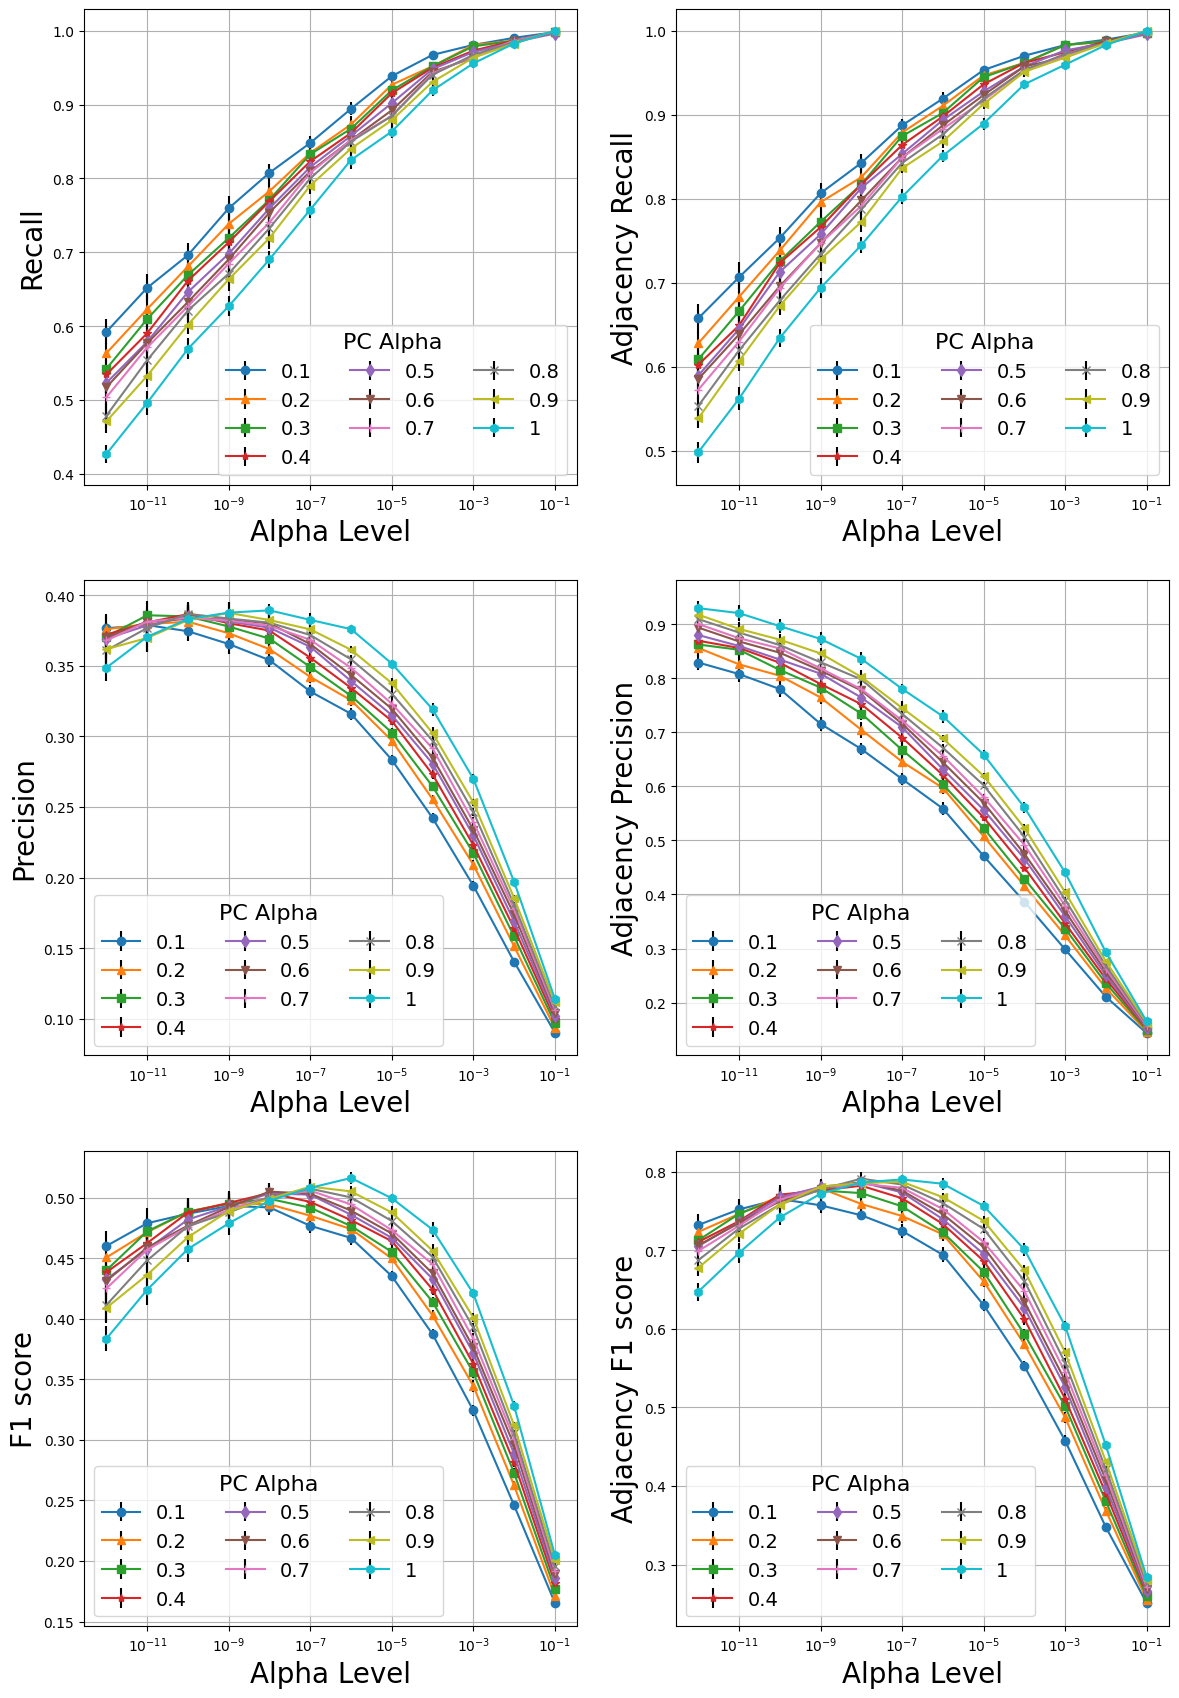

In [51]:
# Recall and Precision, and F1_score vs alpha for adjacency
plt.figure(figsize = (14, 21))
for k in range(0, len(pc_alpha)):

    pcmci_adj_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_adj_precision_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    pcmci_adj_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_precision_median_macaque = np.zeros_like(alpha_level_pcmci) 

    pcmci_adj_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    pcmci_adj_F1_score_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci) 

    pcmci_ori_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_ori_precision_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_precision_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_ori_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_F1_score_std_macaque =np.zeros_like(alpha_level_pcmci)
    pcmci_ori_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci)


    for a in range(0,len(alpha_level_pcmci)):

        pcmci_adj_recall_mean_macaque[a] = np.mean(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_recall_std_macaque[a] = np.std(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_recall_median_macaque[a] = np.median(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_adj_precision_mean_macaque[a] = np.mean(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_precision_std_macaque[a] = np.std(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_precision_median_macaque[a] = np.median(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_adj_F1_score_mean_macaque[a] = np.mean(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_F1_score_std_macaque[a] = np.std(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_F1_score_median_macaque[a] = np.median(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_recall_mean_macaque[a] = np.mean(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_recall_std_macaque[a] = np.std(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_recall_median_macaque[a] = np.median(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_precision_mean_macaque[a] = np.mean(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_precision_std_macaque[a] = np.std(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_precision_median_macaque[a] = np.median(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_F1_score_mean_macaque[a] = np.mean(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_F1_score_std_macaque[a] = np.std(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_F1_score_median_macaque[a] = np.median(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])

    plt.subplot(3,2,2)
    plt.errorbar(alpha_level_pcmci, pcmci_adj_recall_mean_macaque, pcmci_adj_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency Recall', fontsize = 20)
    plt.grid()
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,1)
    plt.errorbar(alpha_level_pcmci, pcmci_ori_recall_mean_macaque, pcmci_ori_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Recall', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,4)
    plt.errorbar(alpha_level_pcmci, pcmci_adj_precision_mean_macaque, pcmci_adj_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency Precision', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,3)
    plt.errorbar(alpha_level_pcmci, pcmci_ori_precision_mean_macaque, pcmci_ori_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Precision', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,6)
    plt.errorbar(alpha_level_pcmci, pcmci_adj_F1_score_mean_macaque, pcmci_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


    plt.subplot(3,2,5)
    plt.errorbar(alpha_level_pcmci, pcmci_ori_F1_score_mean_macaque, pcmci_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


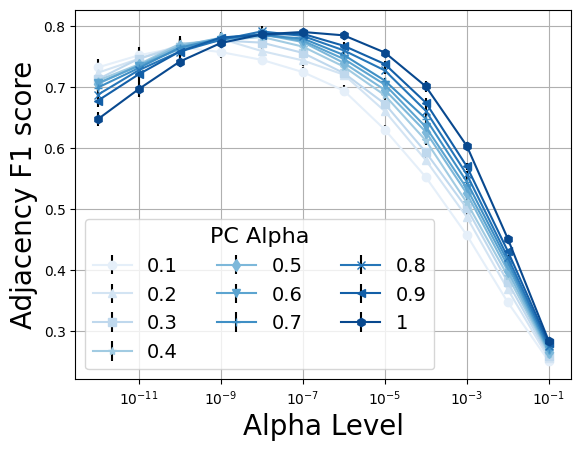

In [52]:
# Recall and Precision, and F1_score vs alpha for adjacency
from matplotlib.cm import Blues

for k in range(0, len(pc_alpha)):

    pcmci_adj_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_adj_precision_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    pcmci_adj_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_precision_median_macaque = np.zeros_like(alpha_level_pcmci) 

    pcmci_adj_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    pcmci_adj_F1_score_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci) 

    pcmci_ori_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_ori_precision_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_precision_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_ori_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_F1_score_std_macaque =np.zeros_like(alpha_level_pcmci)
    pcmci_ori_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci)


    for a in range(0,len(alpha_level_pcmci)):

        pcmci_adj_recall_mean_macaque[a] = np.mean(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_recall_std_macaque[a] = np.std(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_recall_median_macaque[a] = np.median(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_adj_precision_mean_macaque[a] = np.mean(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_precision_std_macaque[a] = np.std(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_precision_median_macaque[a] = np.median(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_adj_F1_score_mean_macaque[a] = np.mean(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_F1_score_std_macaque[a] = np.std(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_F1_score_median_macaque[a] = np.median(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_recall_mean_macaque[a] = np.mean(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_recall_std_macaque[a] = np.std(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_recall_median_macaque[a] = np.median(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_precision_mean_macaque[a] = np.mean(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_precision_std_macaque[a] = np.std(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_precision_median_macaque[a] = np.median(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_F1_score_mean_macaque[a] = np.mean(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_F1_score_std_macaque[a] = np.std(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_F1_score_median_macaque[a] = np.median(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])


    plt.errorbar(alpha_level_pcmci, pcmci_adj_F1_score_mean_macaque, pcmci_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Blues', n_colors= len(pc_alpha))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


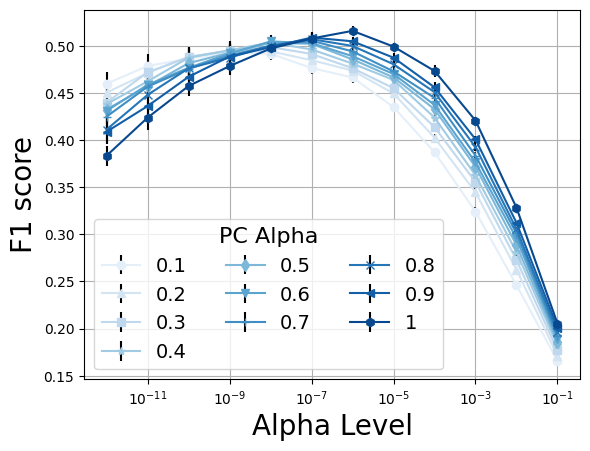

In [53]:
# Recall and Precision, and F1_score vs alpha for adjacency
for k in range(0, len(pc_alpha)):

    pcmci_adj_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_adj_precision_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    pcmci_adj_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_precision_median_macaque = np.zeros_like(alpha_level_pcmci) 

    pcmci_adj_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci) 
    pcmci_adj_F1_score_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_adj_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci) 

    pcmci_ori_recall_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_recall_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_recall_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_ori_precision_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_precision_std_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_precision_median_macaque = np.zeros_like(alpha_level_pcmci)

    pcmci_ori_F1_score_mean_macaque = np.zeros_like(alpha_level_pcmci)
    pcmci_ori_F1_score_std_macaque =np.zeros_like(alpha_level_pcmci)
    pcmci_ori_F1_score_median_macaque = np.zeros_like(alpha_level_pcmci)


    for a in range(0,len(alpha_level_pcmci)):

        pcmci_adj_recall_mean_macaque[a] = np.mean(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_recall_std_macaque[a] = np.std(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_recall_median_macaque[a] = np.median(np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_adj_precision_mean_macaque[a] = np.mean(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_precision_std_macaque[a] = np.std(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_precision_median_macaque[a] = np.median(np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_adj_F1_score_mean_macaque[a] = np.mean(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_F1_score_std_macaque[a] = np.std(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_adj_F1_score_median_macaque[a] = np.median(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_recall_mean_macaque[a] = np.mean(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_recall_std_macaque[a] = np.std(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_recall_median_macaque[a] = np.median(np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_precision_mean_macaque[a] = np.mean(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_precision_std_macaque[a] = np.std(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_precision_median_macaque[a] = np.median(np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])


        pcmci_ori_F1_score_mean_macaque[a] = np.mean(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_F1_score_std_macaque[a] = np.std(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        pcmci_ori_F1_score_median_macaque[a] = np.median(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])

    plt.errorbar(alpha_level_pcmci, pcmci_ori_F1_score_mean_macaque, pcmci_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Blues', n_colors= len(pc_alpha))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(pc_alpha, fontsize = 14, loc = 'best', ncol = 3, title = 'PC Alpha', title_fontsize = 16)


## VARLiNGAM

### Varlingam Execution Time

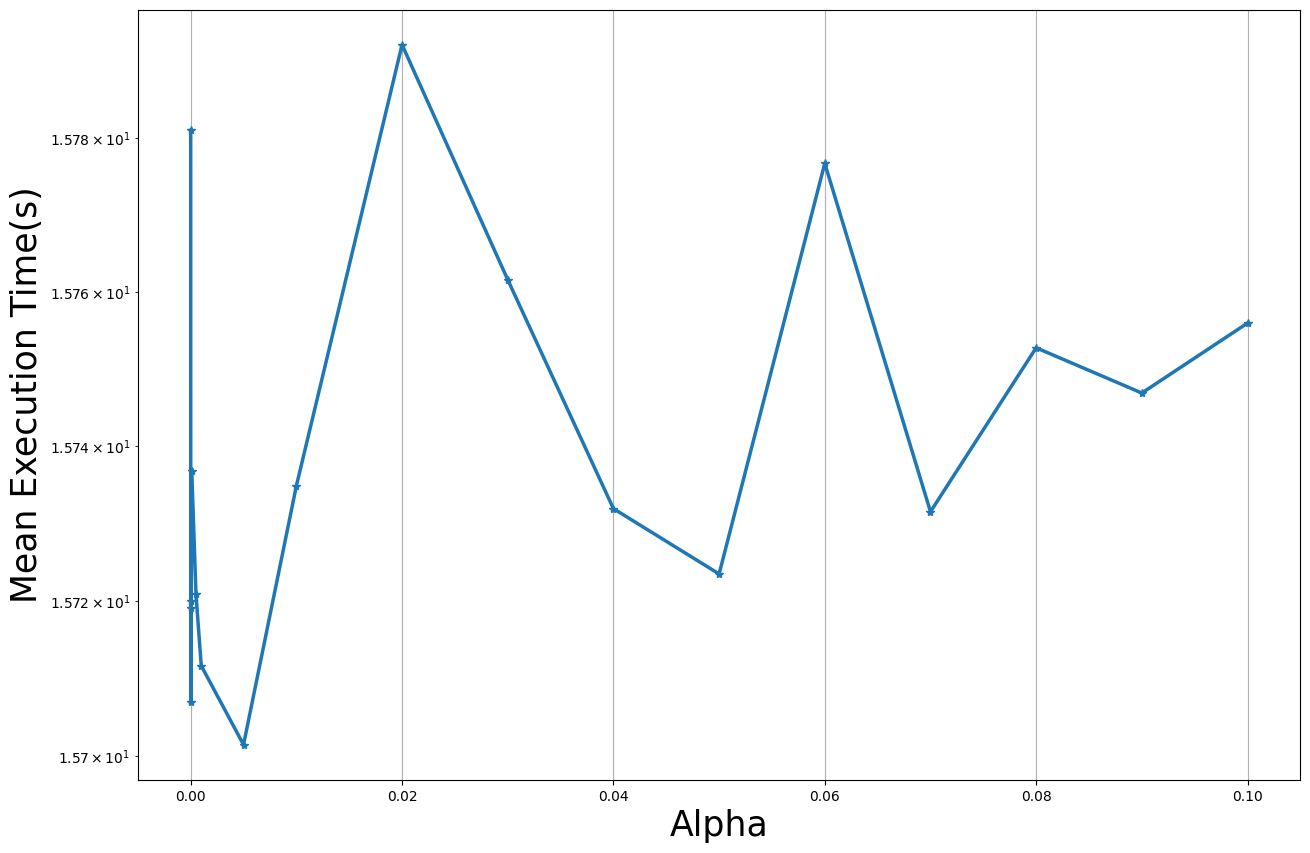

In [54]:
Varlingam_Mean_Exe_Time_Macaque = np.zeros((len(alpha),1))

for a in range(0, len(alpha)):
    Varlingam_Mean_Exe_Time_Macaque[a] = np.mean(varlingam_macaque_execution_time[:,a])

plt.figure(figsize = (15,10))
plt.plot(alpha, Varlingam_Mean_Exe_Time_Macaque, '-*', linewidth = 2.5)
plt.yscale('log')
plt.xlabel('Alpha', fontsize = 25)
plt.ylabel('Mean Execution Time(s)', fontsize = 25)
plt.grid()

In [55]:
varlingam_adj_TPR_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_adj_FPR_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_adj_Recall_all_rep_macaque =[['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_adj_Precision_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_adj_F1_score_all_rep_macaque =[['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]

varlingam_ori_TPR_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_ori_FPR_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_ori_Recall_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_ori_Precision_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]
varlingam_ori_F1_score_all_rep_macaque = [['' for t in range(0, len(alpha))] for j in range(0,num_rep_macaque)]

macaque_ground_truth = ground_truth_graph_matrix_macaques_small

for r in range(0,num_rep_macaque):
    for a in range(0, len(alpha)):

        PAG = np.array(varlingam_link_matrix_macaque[r][a])
        
        summary_graph, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix = funcs.summarize_across_all_lags_v1(PAG)
        adjacency_TPR, adjacency_FPR, adjacency_Recall, adjacency_Precision, adjacency_F1_score, orientation_TPR, orientation_FPR, orientation_Recall,orientation_Precision,orientation_F1_score = funcs.find_tpr_fpr_from_orientation_and_adjacency_matrices(macaque_ground_truth, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix)

        varlingam_adj_TPR_all_rep_macaque[r][a] = adjacency_TPR
        varlingam_adj_FPR_all_rep_macaque[r][a]  = adjacency_FPR
        varlingam_adj_Recall_all_rep_macaque[r][a]  = adjacency_Recall
        varlingam_adj_Precision_all_rep_macaque[r][a] = adjacency_Precision
        varlingam_adj_F1_score_all_rep_macaque[r][a]  = adjacency_F1_score

        varlingam_ori_TPR_all_rep_macaque[r][a]  = orientation_TPR
        varlingam_ori_FPR_all_rep_macaque[r][a] = orientation_FPR
        varlingam_ori_Recall_all_rep_macaque[r][a] = orientation_Recall
        varlingam_ori_Precision_all_rep_macaque[r][a]  = orientation_Precision
        varlingam_ori_F1_score_all_rep_macaque[r][a]  = orientation_F1_score

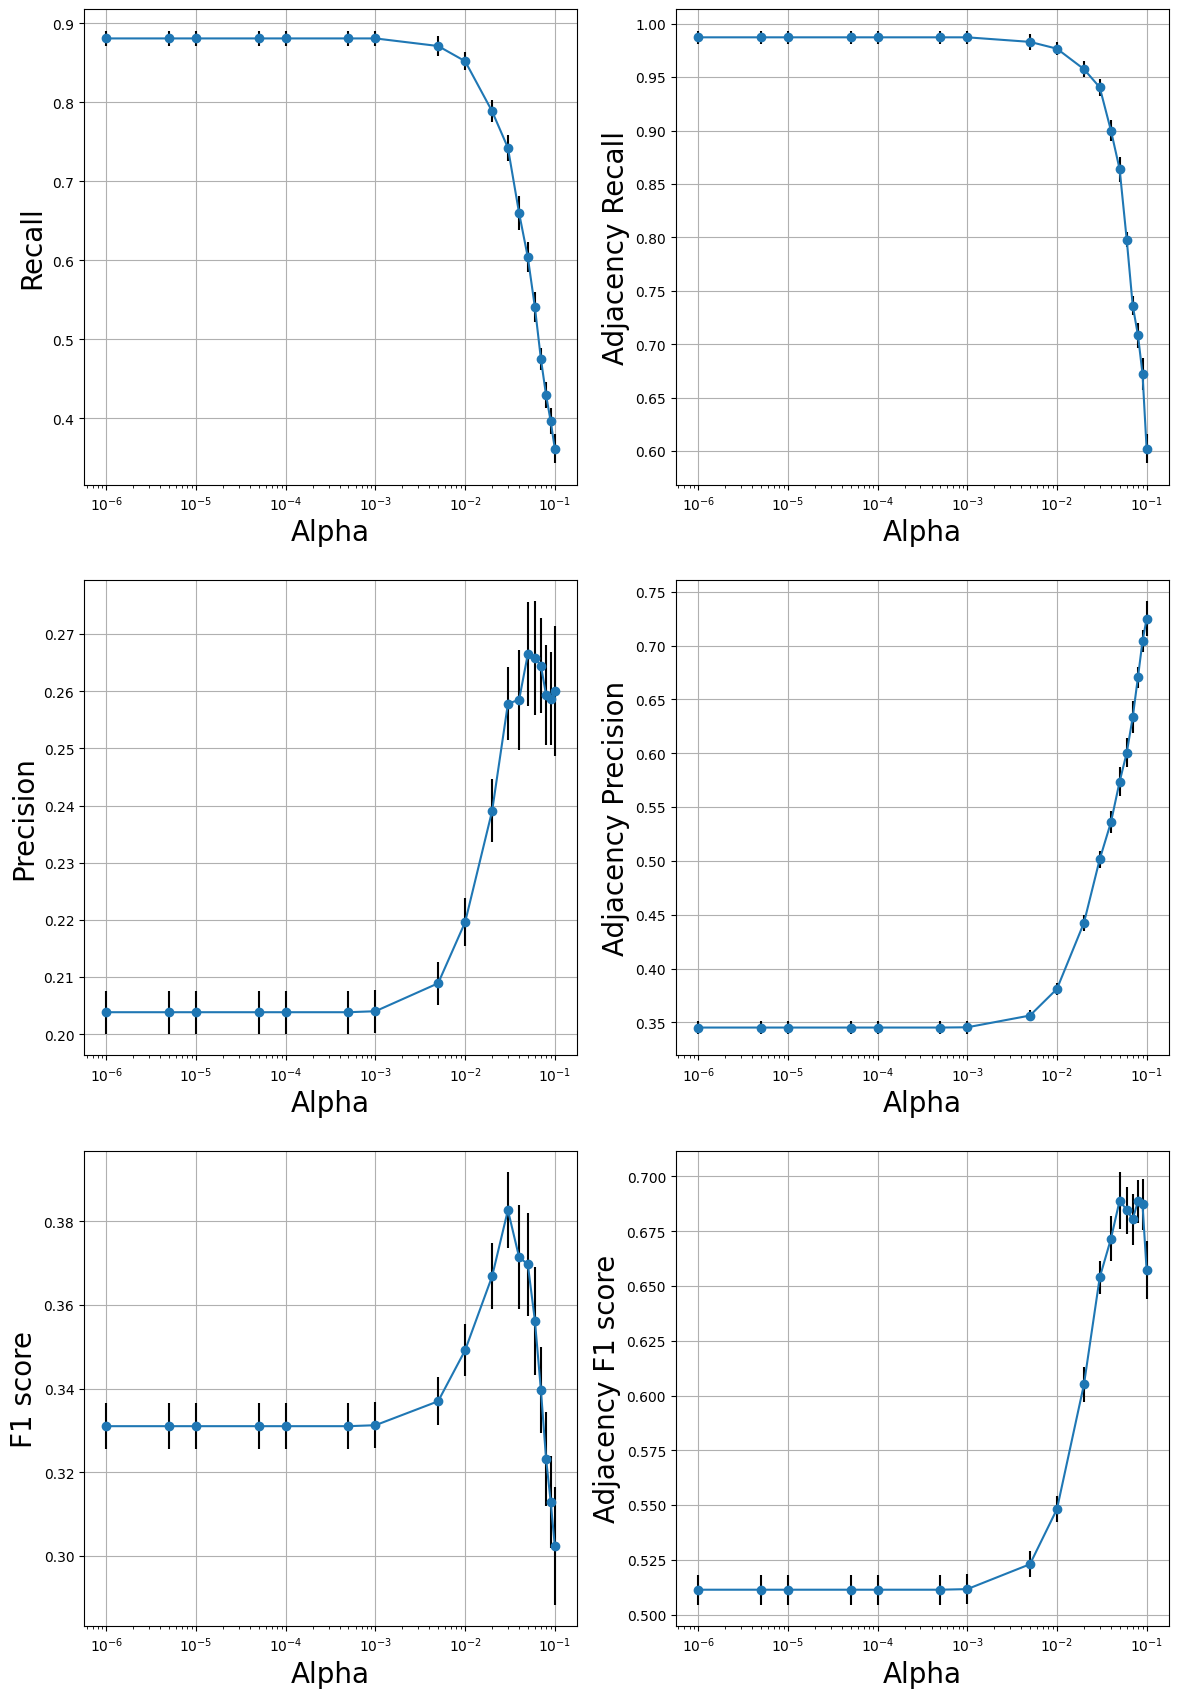

In [56]:
# Recall and Precision, and F1_score vs alpha for adjacency

plt.figure(figsize = (14,21))

varlingam_adj_recall_mean_macaque = np.zeros_like(alpha)
varlingam_adj_recall_std_macaque = np.zeros_like(alpha)
varlingam_adj_recall_median_macaque = np.zeros_like(alpha)

varlingam_adj_precision_mean_macaque = np.zeros_like(alpha) 
varlingam_adj_precision_std_macaque = np.zeros_like(alpha)
varlingam_adj_precision_median_macaque = np.zeros_like(alpha) 

varlingam_adj_F1_score_mean_macaque = np.zeros_like(alpha) 
varlingam_adj_F1_score_std_macaque = np.zeros_like(alpha)
varlingam_adj_F1_score_median_macaque = np.zeros_like(alpha) 

varlingam_ori_recall_mean_macaque = np.zeros_like(alpha)
varlingam_ori_recall_std_macaque = np.zeros_like(alpha)
varlingam_ori_recall_median_macaque = np.zeros_like(alpha)

varlingam_ori_precision_mean_macaque = np.zeros_like(alpha)
varlingam_ori_precision_std_macaque = np.zeros_like(alpha)
varlingam_ori_precision_median_macaque = np.zeros_like(alpha)

varlingam_ori_F1_score_mean_macaque = np.zeros_like(alpha)
varlingam_ori_F1_score_std_macaque =np.zeros_like(alpha)
varlingam_ori_F1_score_median_macaque = np.zeros_like(alpha)


for a in range(0,len(alpha)):

    varlingam_adj_recall_mean_macaque[a] = np.mean(np.array(varlingam_adj_Recall_all_rep_macaque)[:,a])
    varlingam_adj_recall_std_macaque[a] = np.std(np.array(varlingam_adj_Recall_all_rep_macaque)[:,a])
    varlingam_adj_recall_median_macaque[a] = np.median(np.array(varlingam_adj_Recall_all_rep_macaque)[:,a])


    varlingam_adj_precision_mean_macaque[a] = np.mean(np.array(varlingam_adj_Precision_all_rep_macaque)[:,a])
    varlingam_adj_precision_std_macaque[a] = np.std(np.array(varlingam_adj_Precision_all_rep_macaque)[:,a])
    varlingam_adj_precision_median_macaque[a] = np.median(np.array(varlingam_adj_Precision_all_rep_macaque)[:,a])


    varlingam_adj_F1_score_mean_macaque[a] = np.mean(np.array(varlingam_adj_F1_score_all_rep_macaque)[:,a])
    varlingam_adj_F1_score_std_macaque[a] = np.std(np.array(varlingam_adj_F1_score_all_rep_macaque)[:,a])
    varlingam_adj_F1_score_median_macaque[a] = np.median(np.array(varlingam_adj_F1_score_all_rep_macaque)[:,a])


    varlingam_ori_recall_mean_macaque[a] = np.mean(np.array(varlingam_ori_Recall_all_rep_macaque)[:,a])
    varlingam_ori_recall_std_macaque[a] = np.std(np.array(varlingam_ori_Recall_all_rep_macaque)[:,a])
    varlingam_ori_recall_median_macaque[a] = np.median(np.array(varlingam_ori_Recall_all_rep_macaque)[:,a])


    varlingam_ori_precision_mean_macaque[a] = np.mean(np.array(varlingam_ori_Precision_all_rep_macaque)[:,a])
    varlingam_ori_precision_std_macaque[a] = np.std(np.array(varlingam_ori_Precision_all_rep_macaque)[:,a])
    varlingam_ori_precision_median_macaque[a] = np.median(np.array(varlingam_ori_Precision_all_rep_macaque)[:,a])


    varlingam_ori_F1_score_mean_macaque[a] = np.mean(np.array(varlingam_ori_F1_score_all_rep_macaque)[:,a])
    varlingam_ori_F1_score_std_macaque[a] = np.std(np.array(varlingam_ori_F1_score_all_rep_macaque)[:,a])
    varlingam_ori_F1_score_median_macaque[a] = np.median(np.array(varlingam_ori_F1_score_all_rep_macaque)[:,a])

varlingam_best_alpha_adj_mean= alpha[np.argmax(varlingam_adj_F1_score_mean_macaque)]
varlingam_best_alpha_adj_median = alpha[np.argmax(varlingam_adj_F1_score_median_macaque)]
varlingam_best_alpha_ori_mean = alpha[np.argmax(varlingam_ori_F1_score_mean_macaque)]
varlingam_best_alpha_ori_median = alpha[np.argmax(varlingam_ori_F1_score_median_macaque)]

plt.subplot(3,2,2)
plt.errorbar(alpha, varlingam_adj_recall_mean_macaque, varlingam_adj_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.xscale('log')
plt.ylabel('Adjacency Recall', fontsize = 20)
plt.grid()

plt.subplot(3,2,1)
plt.errorbar(alpha, varlingam_ori_recall_mean_macaque, varlingam_ori_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Recall', fontsize = 20)
plt.xscale('log')
plt.xscale('log')
plt.grid()


plt.subplot(3,2,4)
plt.errorbar(alpha, varlingam_adj_precision_mean_macaque, varlingam_adj_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.xscale('log')
plt.ylabel('Adjacency Precision', fontsize = 20)
plt.grid()

plt.subplot(3,2,3)
plt.errorbar(alpha, varlingam_ori_precision_mean_macaque, varlingam_ori_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Precision', fontsize = 20)
plt.xscale('log')
plt.grid()

plt.subplot(3,2,6)
plt.errorbar(alpha, varlingam_adj_F1_score_mean_macaque, varlingam_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Adjacency F1 score', fontsize = 20)
plt.xscale('log')
plt.grid()

plt.subplot(3,2,5)
plt.errorbar(alpha, varlingam_ori_F1_score_mean_macaque, varlingam_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('F1 score', fontsize = 20)
plt.xscale('log')
plt.grid()


## Dynotears

### Dynotears Execution Time

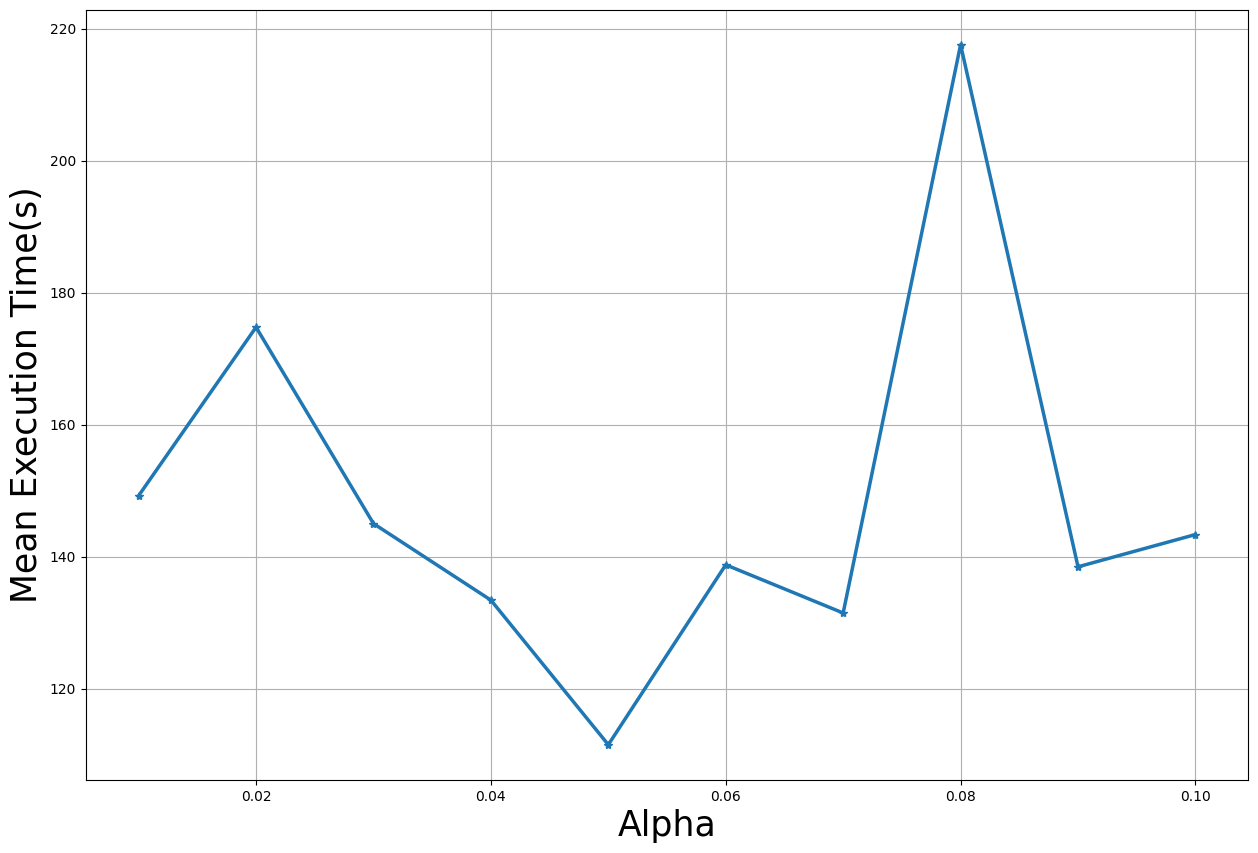

In [57]:
Dynotears_Mean_Exe_Time_Macaque = np.zeros((len(alpha_dynotears),1))

for a in range(0, len(alpha_dynotears)):
    Dynotears_Mean_Exe_Time_Macaque[a] = np.mean(dynotears_macaque_execution_time[:][a])

plt.figure(figsize = (15,10))
plt.plot(alpha_dynotears, Dynotears_Mean_Exe_Time_Macaque, '-*', linewidth = 2.5)
plt.xlabel('Alpha', fontsize = 25)
plt.ylabel('Mean Execution Time(s)', fontsize = 25)
plt.grid()

### DYNOTEARS

In [58]:
dynotears_adj_TPR_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_adj_FPR_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_adj_Recall_all_rep_macaque =[['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_adj_Precision_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_adj_F1_score_all_rep_macaque =[['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]

dynotears_ori_TPR_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_ori_FPR_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_ori_Recall_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_ori_Precision_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]
dynotears_ori_F1_score_all_rep_macaque = [['' for t in range(0, len(alpha_dynotears))] for j in range(0,num_rep_macaque)]

macaque_ground_truth = ground_truth_graph_matrix_macaques_small

for r in range(0,num_rep_macaque):
    for a in range(0, len(alpha_dynotears)):

        PAG = np.array(dynotears_link_matrix_all_macaque[r][a])

        summary_graph, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix = funcs.summarize_across_all_lags_v1(PAG)
        adjacency_TPR, adjacency_FPR, adjacency_Recall, adjacency_Precision, adjacency_F1_score, orientation_TPR, orientation_FPR, orientation_Recall,orientation_Precision,orientation_F1_score = funcs.find_tpr_fpr_from_orientation_and_adjacency_matrices(macaque_ground_truth, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix)

        dynotears_adj_TPR_all_rep_macaque[r][a] = adjacency_TPR
        dynotears_adj_FPR_all_rep_macaque[r][a]  = adjacency_FPR
        dynotears_adj_Recall_all_rep_macaque[r][a]  = adjacency_Recall
        dynotears_adj_Precision_all_rep_macaque[r][a] = adjacency_Precision
        dynotears_adj_F1_score_all_rep_macaque[r][a]  = adjacency_F1_score

        dynotears_ori_TPR_all_rep_macaque[r][a]  = orientation_TPR
        dynotears_ori_FPR_all_rep_macaque[r][a] = orientation_FPR
        dynotears_ori_Recall_all_rep_macaque[r][a] = orientation_Recall
        dynotears_ori_Precision_all_rep_macaque[r][a]  = orientation_Precision
        dynotears_ori_F1_score_all_rep_macaque[r][a]  = orientation_F1_score

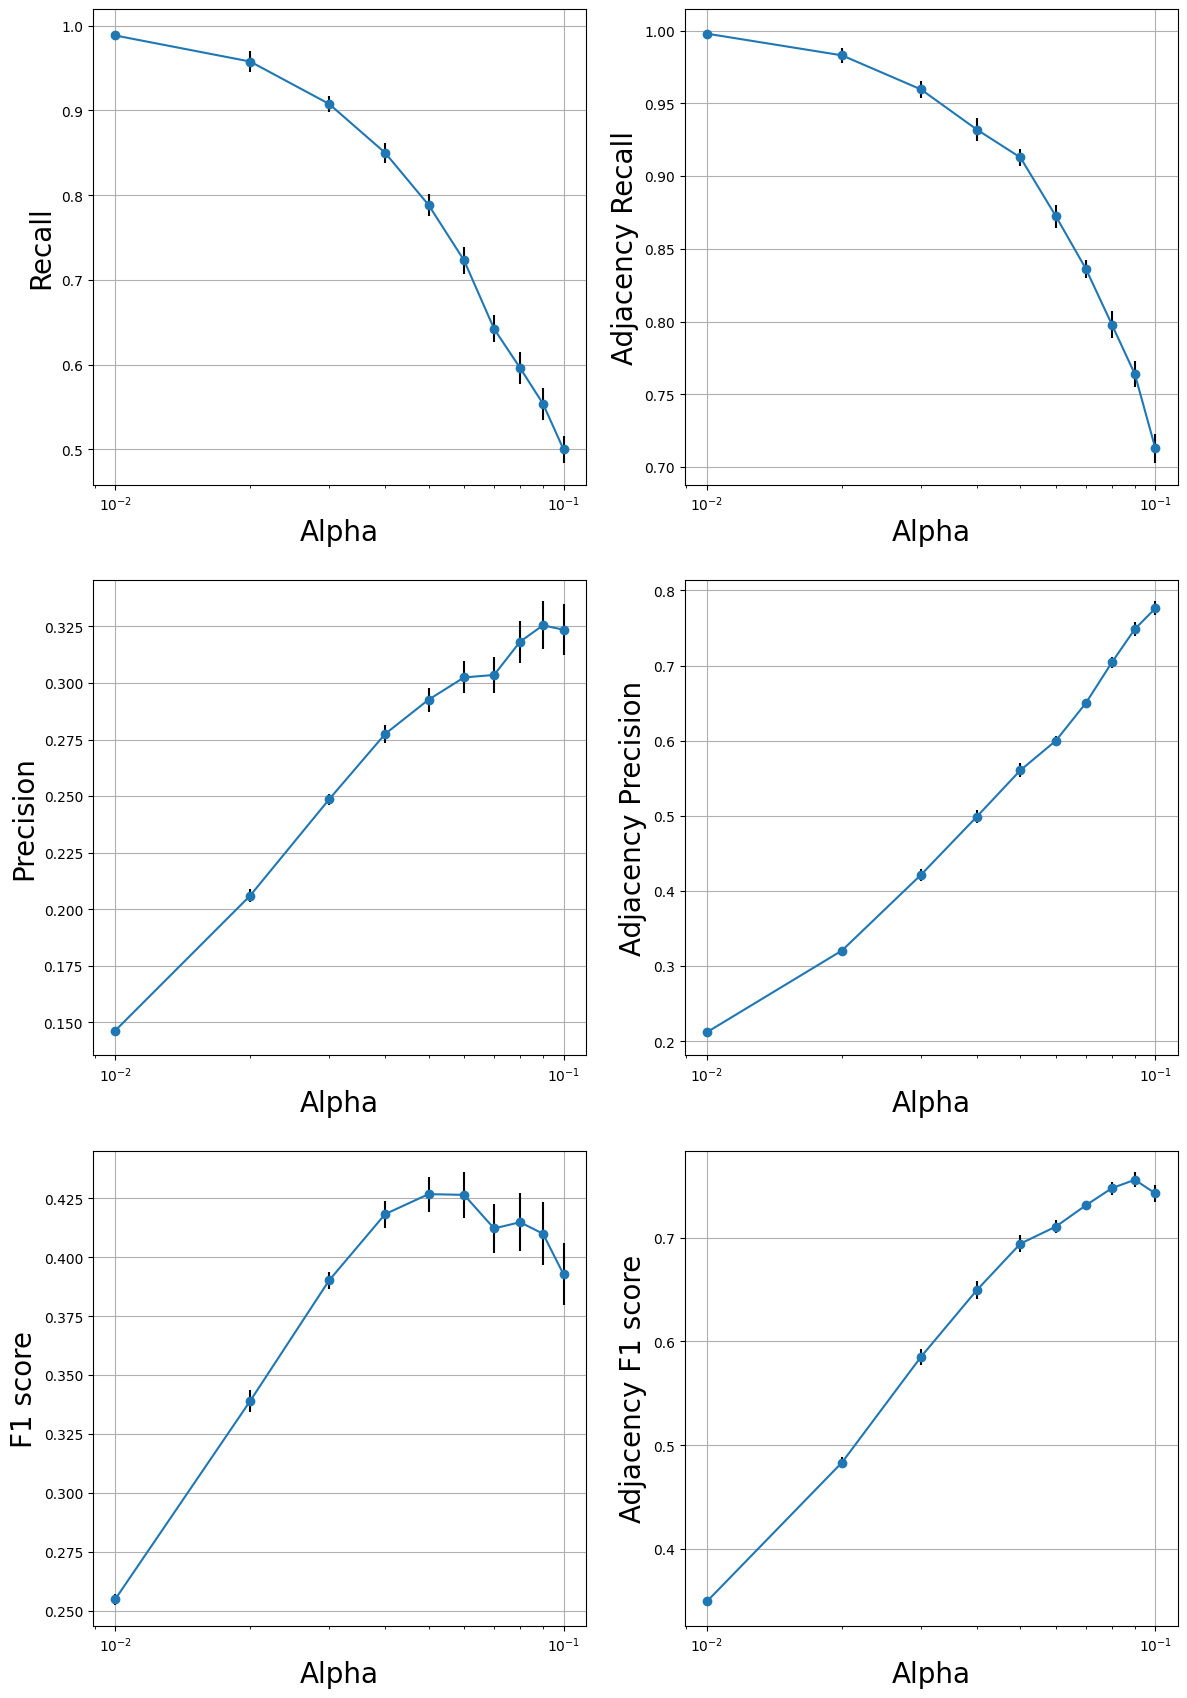

In [59]:

plt.figure(figsize = (14, 21))

dynotears_adj_recall_mean_macaque = np.zeros_like(alpha_dynotears)
dynotears_adj_recall_std_macaque = np.zeros_like(alpha_dynotears)
dynotears_adj_recall_median_macaque = np.zeros_like(alpha_dynotears)

dynotears_adj_precision_mean_macaque = np.zeros_like(alpha_dynotears) 
dynotears_adj_precision_std_macaque = np.zeros_like(alpha_dynotears)
dynotears_adj_precision_median_macaque = np.zeros_like(alpha_dynotears) 

dynotears_adj_F1_score_mean_macaque = np.zeros_like(alpha_dynotears) 
dynotears_adj_F1_score_std_macaque = np.zeros_like(alpha_dynotears)
dynotears_adj_F1_score_median_macaque = np.zeros_like(alpha_dynotears) 

dynotears_ori_recall_mean_macaque = np.zeros_like(alpha_dynotears)
dynotears_ori_recall_std_macaque = np.zeros_like(alpha_dynotears)
dynotears_ori_recall_median_macaque = np.zeros_like(alpha_dynotears)

dynotears_ori_precision_mean_macaque = np.zeros_like(alpha_dynotears)
dynotears_ori_precision_std_macaque = np.zeros_like(alpha_dynotears)
dynotears_ori_precision_median_macaque = np.zeros_like(alpha_dynotears)

dynotears_ori_F1_score_mean_macaque = np.zeros_like(alpha_dynotears)
dynotears_ori_F1_score_std_macaque =np.zeros_like(alpha_dynotears)
dynotears_ori_F1_score_median_macaque = np.zeros_like(alpha_dynotears)

for a in range(0,len(alpha_dynotears)):

    dynotears_adj_recall_mean_macaque[a] = np.mean(np.array(dynotears_adj_Recall_all_rep_macaque)[:,a])
    dynotears_adj_recall_std_macaque[a] = np.std(np.array(dynotears_adj_Recall_all_rep_macaque)[:,a])
    dynotears_adj_recall_median_macaque[a] = np.median(np.array(dynotears_adj_Recall_all_rep_macaque)[:,a])


    dynotears_adj_precision_mean_macaque[a] = np.mean(np.array(dynotears_adj_Precision_all_rep_macaque)[:,a])
    dynotears_adj_precision_std_macaque[a] = np.std(np.array(dynotears_adj_Precision_all_rep_macaque)[:,a])
    dynotears_adj_precision_median_macaque[a] = np.median(np.array(dynotears_adj_Precision_all_rep_macaque)[:,a])


    dynotears_adj_F1_score_mean_macaque[a] = np.mean(np.array(dynotears_adj_F1_score_all_rep_macaque)[:,a])
    dynotears_adj_F1_score_std_macaque[a] = np.std(np.array(dynotears_adj_F1_score_all_rep_macaque)[:,a])
    dynotears_adj_F1_score_median_macaque[a] = np.median(np.array(dynotears_adj_F1_score_all_rep_macaque)[:,a])


    dynotears_ori_recall_mean_macaque[a] = np.mean(np.array(dynotears_ori_Recall_all_rep_macaque)[:,a])
    dynotears_ori_recall_std_macaque[a] = np.std(np.array(dynotears_ori_Recall_all_rep_macaque)[:,a])
    dynotears_ori_recall_median_macaque[a] = np.median(np.array(dynotears_ori_Recall_all_rep_macaque)[:,a])


    dynotears_ori_precision_mean_macaque[a] = np.mean(np.array(dynotears_ori_Precision_all_rep_macaque)[:,a])
    dynotears_ori_precision_std_macaque[a] = np.std(np.array(dynotears_ori_Precision_all_rep_macaque)[:,a])
    dynotears_ori_precision_median_macaque[a] = np.median(np.array(dynotears_ori_Precision_all_rep_macaque)[:,a])

    dynotears_ori_F1_score_mean_macaque[a] = np.mean(np.array(dynotears_ori_F1_score_all_rep_macaque)[:,a])
    dynotears_ori_F1_score_std_macaque[a] = np.std(np.array(dynotears_ori_F1_score_all_rep_macaque)[:,a])
    dynotears_ori_F1_score_median_macaque[a] = np.median(np.array(dynotears_ori_F1_score_all_rep_macaque)[:,a])

dynotears_best_alpha_adj_mean= alpha_dynotears[np.argmax(dynotears_adj_F1_score_mean_macaque)]
dynotears_best_alpha_adj_median = alpha_dynotears[np.argmax(dynotears_adj_F1_score_median_macaque)]
dynotears_best_alpha_ori_mean = alpha_dynotears[np.argmax(dynotears_ori_F1_score_mean_macaque)]
dynotears_best_alpha_ori_median = alpha_dynotears[np.argmax(dynotears_ori_F1_score_median_macaque)]

plt.subplot(3,2,2)
plt.errorbar(alpha_dynotears, dynotears_adj_recall_mean_macaque, dynotears_adj_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.xscale('log')
plt.ylabel('Adjacency Recall', fontsize = 20)
plt.grid()

plt.subplot(3,2,1)
plt.errorbar(alpha_dynotears, dynotears_ori_recall_mean_macaque, dynotears_ori_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Recall', fontsize = 20)
plt.xscale('log')
plt.xscale('log')
plt.grid()


plt.subplot(3,2,4)
plt.errorbar(alpha_dynotears, dynotears_adj_precision_mean_macaque, dynotears_adj_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.xscale('log')
plt.ylabel('Adjacency Precision', fontsize = 20)
plt.grid()

plt.subplot(3,2,3)
plt.errorbar(alpha_dynotears, dynotears_ori_precision_mean_macaque, dynotears_ori_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Precision', fontsize = 20)
plt.xscale('log')
plt.grid()

plt.subplot(3,2,6)
plt.errorbar(alpha_dynotears, dynotears_adj_F1_score_mean_macaque, dynotears_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Adjacency F1 score', fontsize = 20)
plt.xscale('log')
plt.grid()

plt.subplot(3,2,5)
plt.errorbar(alpha_dynotears, dynotears_ori_F1_score_mean_macaque, dynotears_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = 'o-')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('F1 score', fontsize = 20)
plt.xscale('log')
plt.grid()


## MVGC (Multivariate Granger Causality)

### Execution Time for MVGC

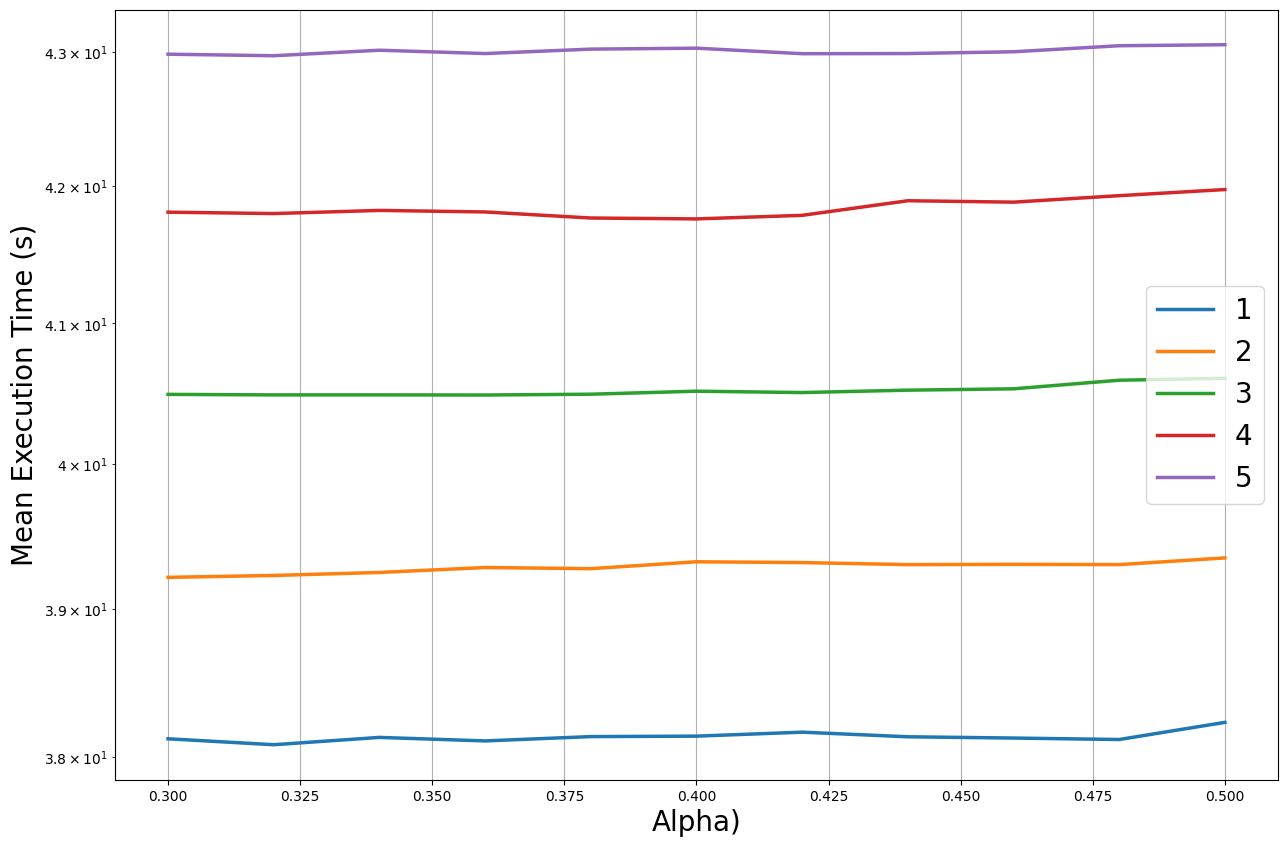

In [60]:
MVGC_Mean_Exe_Time_Macaque = np.zeros((len(mvgc_lags), len(mvgc_alpha)))
plt.figure(figsize = (15,10))

for l in range(0,len(mvgc_lags)):
    for a in range(0, len(mvgc_alpha)):
        MVGC_Mean_Exe_Time_Macaque[l][a] = np.mean(np.array(mvgc_macaque_execution_time)[:,l,a])

    plt.plot(mvgc_alpha, MVGC_Mean_Exe_Time_Macaque[:][l], linewidth = 2.5)
    plt.yscale('log')
    plt.xlabel('Alpha)', fontsize = 20)
    plt.ylabel('Mean Execution Time (s)', fontsize = 20)
    plt.grid()
plt.legend(mvgc_lags,fontsize = 20)

### MVGC Performance

In [61]:
mvgc_adj_TPR_all_rep_macaque_both_alpha = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_adj_FPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_adj_Recall_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_adj_Precision_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_adj_F1_score_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]

mvgc_ori_TPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_ori_FPR_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_ori_Recall_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_ori_Precision_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]
mvgc_ori_F1_score_all_rep_macaque_both_alpha  = [[['' for t in range(0, len(mvgc_alpha))] for j in range(0,len(mvgc_lags))] for i in range(0,num_rep_macaque_all )]

macaque_ground_truth = ground_truth_graph_matrix_macaques_small

for r in range(0,num_rep_macaque_all):
    for l in range(0, len(mvgc_lags)):
        for a in range(0, len(mvgc_alpha)):

            DAG = np.array(mvgc_link_matrix_all_macaque[r][l][a])-1
            estimated_non_zero_lags_combined = DAG
            adjacency_TPR, adjacency_FPR, adjacency_Recall, adjacency_Precision, adjacency_F1_score, orientation_TPR, orientation_FPR, orientation_Recall,orientation_Precision,orientation_F1_score = funcs.find_tpr_fpr_from_binary_matrix(macaque_ground_truth, estimated_non_zero_lags_combined)

            mvgc_adj_TPR_all_rep_macaque_both_alpha[r][l][a] = adjacency_TPR
            mvgc_adj_FPR_all_rep_macaque_both_alpha[r][l][a]  = adjacency_FPR
            mvgc_adj_Recall_all_rep_macaque_both_alpha[r][l][a]  = adjacency_Recall
            mvgc_adj_Precision_all_rep_macaque_both_alpha[r][l][a] = adjacency_Precision
            mvgc_adj_F1_score_all_rep_macaque_both_alpha[r][l][a] = adjacency_F1_score

            mvgc_ori_TPR_all_rep_macaque_both_alpha[r][l][a] = orientation_TPR
            mvgc_ori_FPR_all_rep_macaque_both_alpha[r][l][a]= orientation_FPR
            mvgc_ori_Recall_all_rep_macaque_both_alpha[r][l][a] = orientation_Recall
            mvgc_ori_Precision_all_rep_macaque_both_alpha[r][l][a]  = orientation_Precision
            mvgc_ori_F1_score_all_rep_macaque_both_alpha[r][l][a] = orientation_F1_score


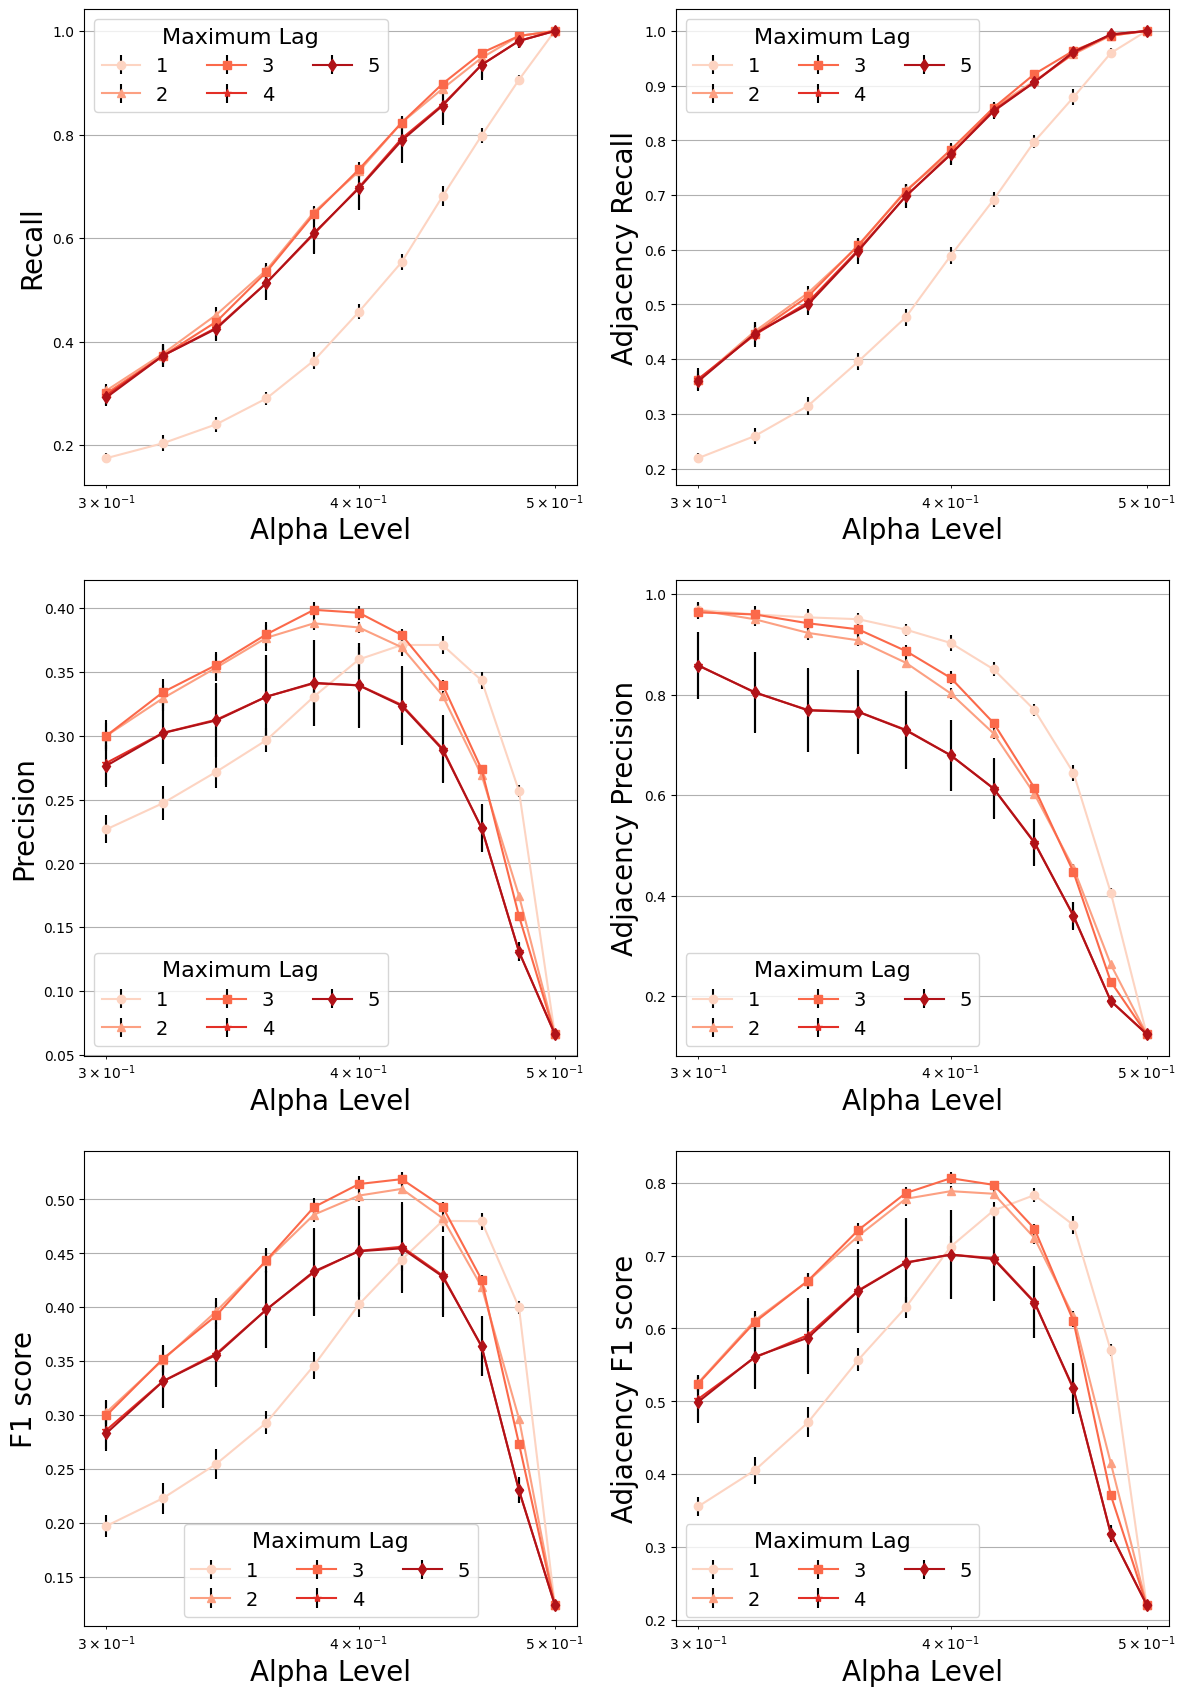

In [62]:
plt.figure(figsize = (14, 21))


for k in range(0, len(mvgc_lags)):

    mvgc_adj_recall_mean_macaque = np.zeros_like(mvgc_alpha)
    mvgc_adj_recall_std_macaque = np.zeros_like(mvgc_alpha)
    mvgc_adj_recall_median_macaque = np.zeros_like(mvgc_alpha)

    mvgc_adj_precision_mean_macaque = np.zeros_like(mvgc_alpha) 
    mvgc_adj_precision_std_macaque = np.zeros_like(mvgc_alpha)
    mvgc_adj_precision_median_macaque = np.zeros_like(mvgc_alpha) 

    mvgc_adj_F1_score_mean_macaque = np.zeros_like(mvgc_alpha) 
    mvgc_adj_F1_score_std_macaque = np.zeros_like(mvgc_alpha)
    mvgc_adj_F1_score_median_macaque = np.zeros_like(mvgc_alpha) 

    mvgc_ori_recall_mean_macaque = np.zeros_like(mvgc_alpha)
    mvgc_ori_recall_std_macaque = np.zeros_like(mvgc_alpha)
    mvgc_ori_recall_median_macaque = np.zeros_like(mvgc_alpha)

    mvgc_ori_precision_mean_macaque = np.zeros_like(mvgc_alpha)
    mvgc_ori_precision_std_macaque = np.zeros_like(mvgc_alpha)
    mvgc_ori_precision_median_macaque = np.zeros_like(mvgc_alpha)

    mvgc_ori_F1_score_mean_macaque = np.zeros_like(mvgc_alpha)
    mvgc_ori_F1_score_std_macaque =np.zeros_like(mvgc_alpha)
    mvgc_ori_F1_score_median_macaque = np.zeros_like(mvgc_alpha)


    for a in range(0,len(mvgc_alpha)):

        mvgc_adj_recall_mean_macaque[a] = np.mean(np.array(mvgc_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_adj_recall_std_macaque[a] = np.std(np.array(mvgc_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_adj_recall_median_macaque[a] = np.median(np.array(mvgc_adj_Recall_all_rep_macaque_both_alpha)[:,k,a])


        mvgc_adj_precision_mean_macaque[a] = np.mean(np.array(mvgc_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_adj_precision_std_macaque[a] = np.std(np.array(mvgc_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_adj_precision_median_macaque[a] = np.median(np.array(mvgc_adj_Precision_all_rep_macaque_both_alpha)[:,k,a])


        mvgc_adj_F1_score_mean_macaque[a] = np.mean(np.array(mvgc_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_adj_F1_score_std_macaque[a] = np.std(np.array(mvgc_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_adj_F1_score_median_macaque[a] = np.median(np.array(mvgc_adj_F1_score_all_rep_macaque_both_alpha)[:,k,a])


        mvgc_ori_recall_mean_macaque[a] = np.mean(np.array(mvgc_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_ori_recall_std_macaque[a] = np.std(np.array(mvgc_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_ori_recall_median_macaque[a] = np.median(np.array(mvgc_ori_Recall_all_rep_macaque_both_alpha)[:,k,a])


        mvgc_ori_precision_mean_macaque[a] = np.mean(np.array(mvgc_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_ori_precision_std_macaque[a] = np.std(np.array(mvgc_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_ori_precision_median_macaque[a] = np.median(np.array(mvgc_ori_Precision_all_rep_macaque_both_alpha)[:,k,a])


        mvgc_ori_F1_score_mean_macaque[a] = np.mean(np.array(mvgc_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_ori_F1_score_std_macaque[a] = np.std(np.array(mvgc_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])
        mvgc_ori_F1_score_median_macaque[a] = np.median(np.array(mvgc_ori_F1_score_all_rep_macaque_both_alpha)[:,k,a])

    mvgc_best_alpha_adj_mean= mvgc_alpha[np.argmax(mvgc_adj_F1_score_mean_macaque)]
    mvgc_best_alpha_adj_median = mvgc_alpha[np.argmax(mvgc_adj_F1_score_median_macaque)]
    mvgc_best_alpha_ori_mean = mvgc_alpha[np.argmax(mvgc_ori_F1_score_mean_macaque)]
    mvgc_best_alpha_ori_median = mvgc_alpha[np.argmax(mvgc_ori_F1_score_median_macaque)]

    plt.subplot(3,2,2)
    plt.errorbar(mvgc_alpha, mvgc_adj_recall_mean_macaque, mvgc_adj_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Reds', n_colors= len(mvgc_lags))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency Recall', fontsize = 20)
    plt.grid()
    plt.grid(visible = True)
    plt.legend(mvgc_lags, fontsize = 14, loc = 'best', ncol = 3, title = 'Maximum Lag', title_fontsize = 16)


    plt.subplot(3,2,1)
    plt.errorbar(mvgc_alpha, mvgc_ori_recall_mean_macaque, mvgc_ori_recall_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Reds', n_colors= len(mvgc_lags))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Recall', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(mvgc_lags, fontsize = 14, loc = 'best', ncol = 3, title = 'Maximum Lag', title_fontsize = 16)


    plt.subplot(3,2,4)
    plt.errorbar(mvgc_alpha, mvgc_adj_precision_mean_macaque, mvgc_adj_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Reds', n_colors= len(mvgc_lags))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency Precision', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(mvgc_lags, fontsize = 14, loc = 'best', ncol = 3, title = 'Maximum Lag', title_fontsize = 16)


    plt.subplot(3,2,3)
    plt.errorbar(mvgc_alpha, mvgc_ori_precision_mean_macaque, mvgc_ori_precision_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Reds', n_colors= len(mvgc_lags))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Precision', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(mvgc_lags, fontsize = 14, loc = 'best', ncol = 3, title = 'Maximum Lag', title_fontsize = 16)


    plt.subplot(3,2,6)
    plt.errorbar(mvgc_alpha, mvgc_adj_F1_score_mean_macaque, mvgc_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Reds', n_colors= len(mvgc_lags))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('Adjacency F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(mvgc_lags, fontsize = 14, loc = 'best', ncol = 3, title = 'Maximum Lag', title_fontsize = 16)


    plt.subplot(3,2,5)
    plt.errorbar(mvgc_alpha, mvgc_ori_F1_score_mean_macaque, mvgc_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque_all), ecolor = 'black', fmt = markers[k], color = sns.color_palette('Reds', n_colors= len(mvgc_lags))[k])
    plt.xscale('log')
    plt.xlabel('Alpha Level', fontsize = 20)
    plt.ylabel('F1 score', fontsize = 20)
    plt.grid(visible = True)
    plt.legend(mvgc_lags, fontsize = 14, loc = 'best', ncol = 3, title = 'Maximum Lag', title_fontsize = 16)


## CaLLTiF

### Execution Time for CaLLTiF

In [63]:
calltif_execution_time_at_best = calltif_macaque_execution_time

### CaLLTiF Performance

In [64]:
calltif_adj_TPR_all_rep_macaque_both_alpha = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_adj_FPR_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_adj_Recall_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_adj_Precision_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_adj_F1_score_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]

calltif_ori_TPR_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_ori_FPR_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_ori_Recall_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_ori_Precision_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]
calltif_ori_F1_score_all_rep_macaque_both_alpha  = [['' for t in range(0, len(calltif_alpha))] for i in range(0,num_rep_macaque )]

macaque_ground_truth = macaque_ground_truth

for r in range(0,num_rep_macaque):
        for a in range(0, len(calltif_alpha)):
            
            p_matrix = np.array(calltif_pval_matrix_all_macaque[r])
    
            # Threshold p_matrix to get graph
            final_graph_new = p_matrix <= calltif_alpha[a]
            
            # Convert to string graph representation
            graph = funcs.convert_to_string_graph(final_graph_new)

            summary_graph, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix = funcs.summarize_across_all_lags_v2(graph)
            adjacency_TPR, adjacency_FPR, adjacency_Recall, adjacency_Precision, adjacency_F1_score, orientation_TPR, orientation_FPR, orientation_Recall,orientation_Precision,orientation_F1_score = funcs.find_tpr_fpr_from_orientation_and_adjacency_matrices(macaque_ground_truth, estimated_adjacency_binary_matrix, estimated_orientation_binary_matrix)
            
            calltif_adj_TPR_all_rep_macaque_both_alpha[r][a] = adjacency_TPR
            calltif_adj_FPR_all_rep_macaque_both_alpha[r][a]  = adjacency_FPR
            calltif_adj_Recall_all_rep_macaque_both_alpha[r][a]  = adjacency_Recall
            calltif_adj_Precision_all_rep_macaque_both_alpha[r][a] = adjacency_Precision
            calltif_adj_F1_score_all_rep_macaque_both_alpha[r][a] = adjacency_F1_score

            calltif_ori_TPR_all_rep_macaque_both_alpha[r][a] = orientation_TPR
            calltif_ori_FPR_all_rep_macaque_both_alpha[r][a]= orientation_FPR
            calltif_ori_Recall_all_rep_macaque_both_alpha[r][a] = orientation_Recall
            calltif_ori_Precision_all_rep_macaque_both_alpha[r][a]  = orientation_Precision
            calltif_ori_F1_score_all_rep_macaque_both_alpha[r][a] = orientation_F1_score


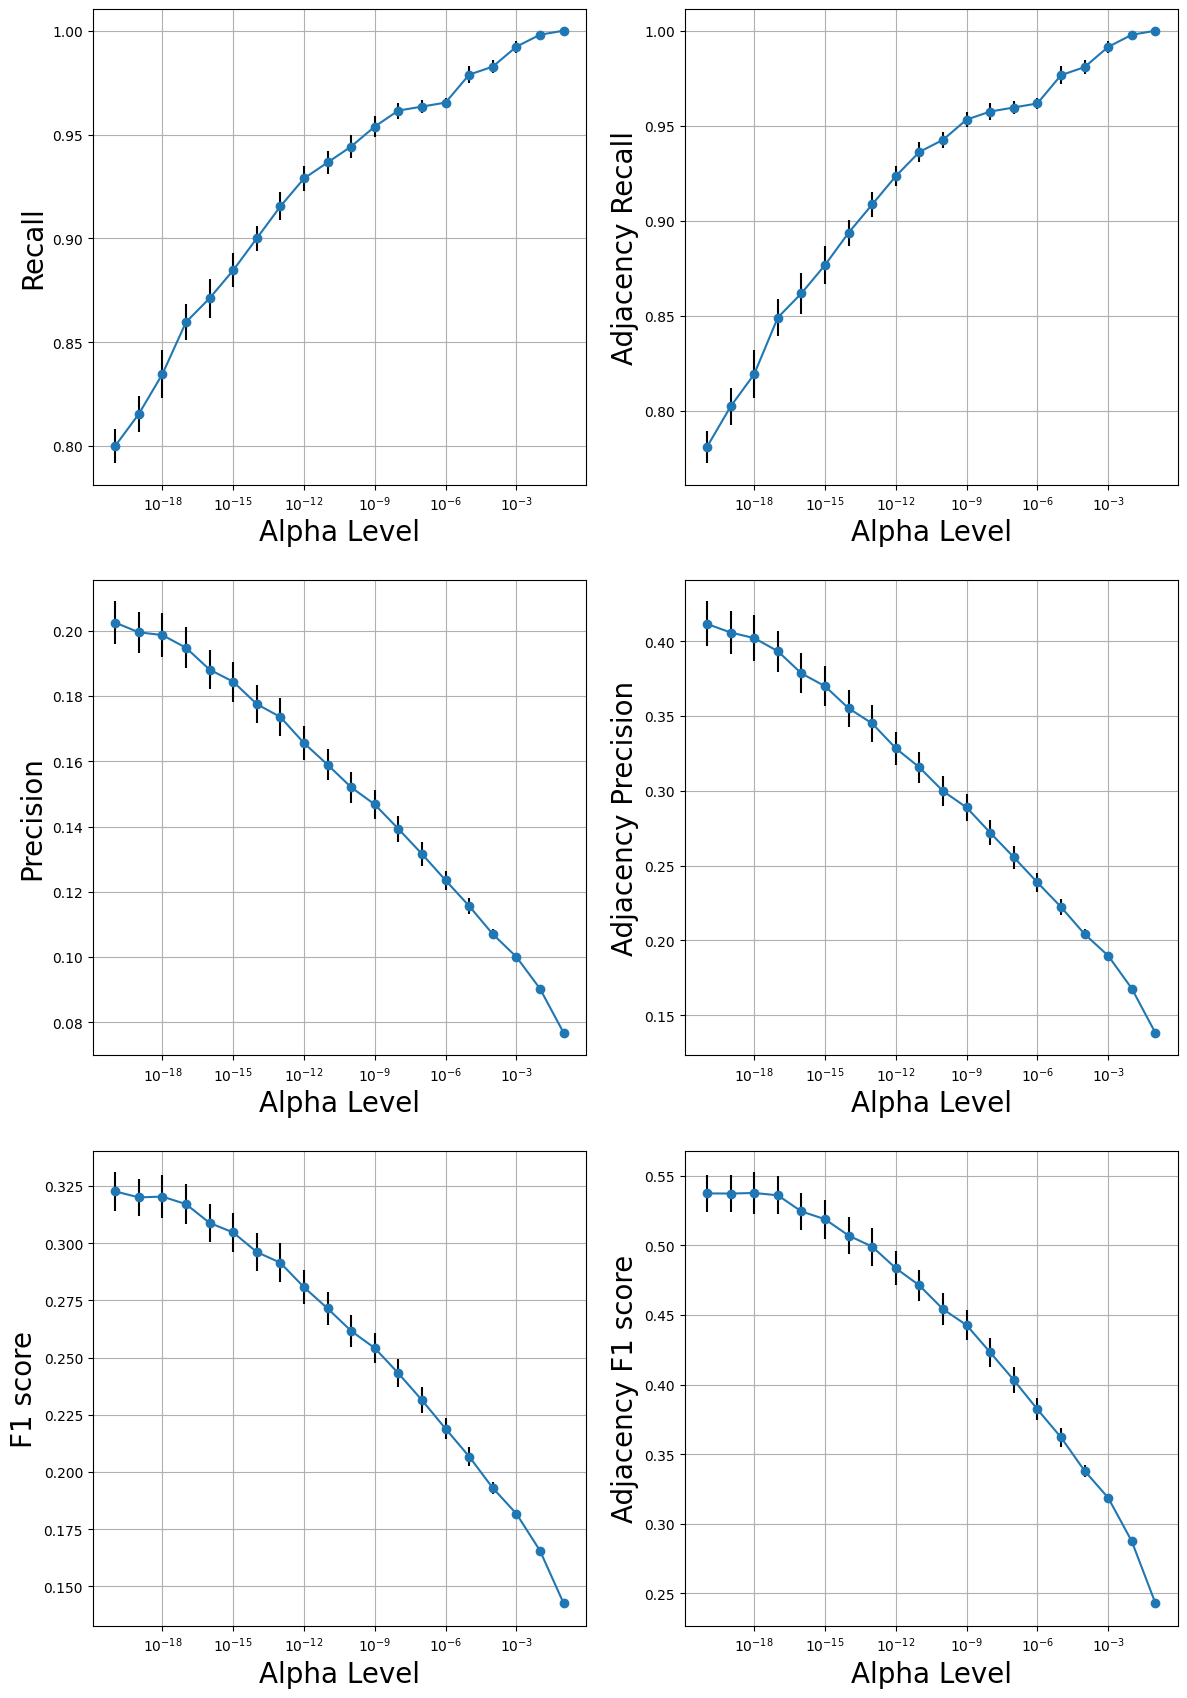

In [65]:
plt.figure(figsize = (14, 21))

calltif_adj_recall_mean_macaque = np.zeros_like(calltif_alpha)
calltif_adj_recall_std_macaque = np.zeros_like(calltif_alpha)
calltif_adj_recall_median_macaque = np.zeros_like(calltif_alpha)

calltif_adj_precision_mean_macaque = np.zeros_like(calltif_alpha) 
calltif_adj_precision_std_macaque = np.zeros_like(calltif_alpha)
calltif_adj_precision_median_macaque = np.zeros_like(calltif_alpha) 

calltif_adj_F1_score_mean_macaque = np.zeros_like(calltif_alpha) 
calltif_adj_F1_score_std_macaque = np.zeros_like(calltif_alpha)
calltif_adj_F1_score_median_macaque = np.zeros_like(calltif_alpha) 

calltif_ori_recall_mean_macaque = np.zeros_like(calltif_alpha)
calltif_ori_recall_std_macaque = np.zeros_like(calltif_alpha)
calltif_ori_recall_median_macaque = np.zeros_like(calltif_alpha)

calltif_ori_precision_mean_macaque = np.zeros_like(calltif_alpha)
calltif_ori_precision_std_macaque = np.zeros_like(calltif_alpha)
calltif_ori_precision_median_macaque = np.zeros_like(calltif_alpha)

calltif_ori_F1_score_mean_macaque = np.zeros_like(calltif_alpha)
calltif_ori_F1_score_std_macaque =np.zeros_like(calltif_alpha)
calltif_ori_F1_score_median_macaque = np.zeros_like(calltif_alpha)

for a in range(0,len(calltif_alpha)):

    calltif_adj_recall_mean_macaque[a] = np.mean(np.array(calltif_adj_Recall_all_rep_macaque_both_alpha)[:,a])
    calltif_adj_recall_std_macaque[a] = np.std(np.array(calltif_adj_Recall_all_rep_macaque_both_alpha)[:,a])
    calltif_adj_recall_median_macaque[a] = np.median(np.array(calltif_adj_Recall_all_rep_macaque_both_alpha)[:,a])


    calltif_adj_precision_mean_macaque[a] = np.mean(np.array(calltif_adj_Precision_all_rep_macaque_both_alpha)[:,a])
    calltif_adj_precision_std_macaque[a] = np.std(np.array(calltif_adj_Precision_all_rep_macaque_both_alpha)[:,a])
    calltif_adj_precision_median_macaque[a] = np.median(np.array(calltif_adj_Precision_all_rep_macaque_both_alpha)[:,a])


    calltif_adj_F1_score_mean_macaque[a] = np.mean(np.array(calltif_adj_F1_score_all_rep_macaque_both_alpha)[:,a])
    calltif_adj_F1_score_std_macaque[a] = np.std(np.array(calltif_adj_F1_score_all_rep_macaque_both_alpha)[:,a])
    calltif_adj_F1_score_median_macaque[a] = np.median(np.array(calltif_adj_F1_score_all_rep_macaque_both_alpha)[:,a])

    calltif_ori_recall_mean_macaque[a] = np.mean(np.array(calltif_ori_Recall_all_rep_macaque_both_alpha)[:,a])
    calltif_ori_recall_std_macaque[a] = np.std(np.array(calltif_ori_Recall_all_rep_macaque_both_alpha)[:,a])
    calltif_ori_recall_median_macaque[a] = np.median(np.array(calltif_ori_Recall_all_rep_macaque_both_alpha)[:,a])

    calltif_ori_precision_mean_macaque[a] = np.mean(np.array(calltif_ori_Precision_all_rep_macaque_both_alpha)[:,a])
    calltif_ori_precision_std_macaque[a] = np.std(np.array(calltif_ori_Precision_all_rep_macaque_both_alpha)[:,a])
    calltif_ori_precision_median_macaque[a] = np.median(np.array(calltif_ori_Precision_all_rep_macaque_both_alpha)[:,a])

    calltif_ori_F1_score_mean_macaque[a] = np.mean(np.array(calltif_ori_F1_score_all_rep_macaque_both_alpha)[:,a])
    calltif_ori_F1_score_std_macaque[a] = np.std(np.array(calltif_ori_F1_score_all_rep_macaque_both_alpha)[:,a])
    calltif_ori_F1_score_median_macaque[a] = np.median(np.array(calltif_ori_F1_score_all_rep_macaque_both_alpha)[:,a])

calltif_best_alpha_adj_mean= calltif_alpha[np.argmax(calltif_adj_F1_score_mean_macaque)]
calltif_best_alpha_adj_median = calltif_alpha[np.argmax(calltif_adj_F1_score_median_macaque)]
calltif_best_alpha_ori_mean = calltif_alpha[np.argmax(calltif_ori_F1_score_mean_macaque)]
calltif_best_alpha_ori_median = calltif_alpha[np.argmax(calltif_ori_F1_score_median_macaque)]

plt.subplot(3,2,2)
plt.errorbar(calltif_alpha, calltif_adj_recall_mean_macaque, calltif_adj_recall_std_macaque/np.sqrt(num_rep_macaque), ecolor = 'black', fmt = '-o')
plt.xscale('log')
plt.xlabel('Alpha Level', fontsize = 20)
plt.ylabel('Adjacency Recall', fontsize = 20)
plt.grid()
plt.grid(visible = True)


plt.subplot(3,2,1)
plt.errorbar(calltif_alpha, calltif_ori_recall_mean_macaque, calltif_ori_recall_std_macaque/np.sqrt(num_rep_macaque), ecolor = 'black', fmt = '-o')
plt.xscale('log')
plt.xlabel('Alpha Level', fontsize = 20)
plt.ylabel('Recall', fontsize = 20)
plt.grid(visible = True)


plt.subplot(3,2,4)
plt.errorbar(calltif_alpha, calltif_adj_precision_mean_macaque, calltif_adj_precision_std_macaque/np.sqrt(num_rep_macaque), ecolor = 'black', fmt = '-o')
plt.xscale('log')
plt.xlabel('Alpha Level', fontsize = 20)
plt.ylabel('Adjacency Precision', fontsize = 20)
plt.grid(visible = True)


plt.subplot(3,2,3)
plt.errorbar(calltif_alpha, calltif_ori_precision_mean_macaque, calltif_ori_precision_std_macaque/np.sqrt(num_rep_macaque), ecolor = 'black', fmt = '-o')
plt.xscale('log')
plt.xlabel('Alpha Level', fontsize = 20)
plt.ylabel('Precision', fontsize = 20)
plt.grid(visible = True)


plt.subplot(3,2,6)
plt.errorbar(calltif_alpha, calltif_adj_F1_score_mean_macaque, calltif_adj_F1_score_std_macaque/np.sqrt(num_rep_macaque), ecolor = 'black', fmt = '-o')
plt.xscale('log')
plt.xlabel('Alpha Level', fontsize = 20)
plt.ylabel('Adjacency F1 score', fontsize = 20)
plt.grid(visible = True)


plt.subplot(3,2,5)
plt.errorbar(calltif_alpha, calltif_ori_F1_score_mean_macaque, calltif_ori_F1_score_std_macaque/np.sqrt(num_rep_macaque), ecolor = 'black', fmt = '-o')
plt.xscale('log')
plt.xlabel('Alpha Level', fontsize = 20)
plt.ylabel('F1 score', fontsize = 20)
plt.grid(visible = True)


## Comparison

### Performance of each method with best hyperparameters

In [66]:
# PCMCI 
pcmci_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha), axis = 0)
pcmci_adj_best_alphas_idx = np.unravel_index(pcmci_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax(), pcmci_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps.shape)
pcmci_adj_F1_scores_at_best = np.array(pcmci_adj_F1_score_all_rep_macaque_both_alpha)[:,pcmci_adj_best_alphas_idx[0], pcmci_adj_best_alphas_idx[1]]
pcmci_adj_Precision_at_best = np.array(pcmci_adj_Precision_all_rep_macaque_both_alpha)[:,pcmci_adj_best_alphas_idx[0], pcmci_adj_best_alphas_idx[1]]
pcmci_adj_Recall_at_best = np.array(pcmci_adj_Recall_all_rep_macaque_both_alpha)[:,pcmci_adj_best_alphas_idx[0], pcmci_adj_best_alphas_idx[1]]

pcmci_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha), axis = 0)
pcmci_ori_best_alphas_idx = np.unravel_index(pcmci_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax(), pcmci_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps.shape)
pcmci_ori_F1_scores_at_best = np.array(pcmci_ori_F1_score_all_rep_macaque_both_alpha)[:,pcmci_ori_best_alphas_idx[0], pcmci_ori_best_alphas_idx[1]]
pcmci_ori_Precision_at_best = np.array(pcmci_ori_Precision_all_rep_macaque_both_alpha)[:,pcmci_ori_best_alphas_idx[0], pcmci_ori_best_alphas_idx[1]]
pcmci_ori_Recall_at_best = np.array(pcmci_ori_Recall_all_rep_macaque_both_alpha)[:,pcmci_ori_best_alphas_idx[0], pcmci_ori_best_alphas_idx[1]]

pcmci_execution_time_at_best = np.array(pcmci_macaque_execution_time)[0:num_rep_macaque,pcmci_ori_best_alphas_idx[0]]

# varlingam
varlingam_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(varlingam_adj_F1_score_all_rep_macaque), axis = 0)
varlingam_adj_best_alphas_idx = varlingam_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax()
varlingam_adj_F1_scores_at_best = np.array(varlingam_adj_F1_score_all_rep_macaque)[:,varlingam_adj_best_alphas_idx]
varlingam_adj_Precision_at_best = np.array(varlingam_adj_Precision_all_rep_macaque)[:,varlingam_adj_best_alphas_idx]
varlingam_adj_Recall_at_best = np.array(varlingam_adj_Recall_all_rep_macaque)[:,varlingam_adj_best_alphas_idx]


varlingam_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(varlingam_ori_F1_score_all_rep_macaque), axis = 0)
varlingam_ori_best_alphas_idx = varlingam_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax()
varlingam_ori_F1_scores_at_best = np.array(varlingam_ori_F1_score_all_rep_macaque)[:,varlingam_ori_best_alphas_idx]
varlingam_ori_Precision_at_best = np.array(varlingam_ori_Precision_all_rep_macaque)[:,varlingam_ori_best_alphas_idx]
varlingam_ori_Recall_at_best = np.array(varlingam_ori_Recall_all_rep_macaque)[:,varlingam_ori_best_alphas_idx]


varlingam_execution_time_at_best = np.array(varlingam_macaque_execution_time)[0:num_rep_macaque,varlingam_ori_best_alphas_idx]

# dynotears
dynotears_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(dynotears_adj_F1_score_all_rep_macaque), axis = 0)
dynotears_adj_best_alphas_idx = dynotears_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax()
dynotears_adj_F1_scores_at_best = np.array(dynotears_adj_F1_score_all_rep_macaque)[:,dynotears_adj_best_alphas_idx]
dynotears_adj_Precision_at_best = np.array(dynotears_adj_Precision_all_rep_macaque)[:,dynotears_adj_best_alphas_idx]
dynotears_adj_Recall_at_best = np.array(dynotears_adj_Recall_all_rep_macaque)[:,dynotears_adj_best_alphas_idx]


dynotears_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(dynotears_ori_F1_score_all_rep_macaque), axis = 0)
dynotears_ori_best_alphas_idx = dynotears_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax()
dynotears_ori_F1_scores_at_best = np.array(dynotears_ori_F1_score_all_rep_macaque)[:,dynotears_ori_best_alphas_idx]
dynotears_ori_Precision_at_best = np.array(dynotears_ori_Precision_all_rep_macaque)[:,dynotears_ori_best_alphas_idx]
dynotears_ori_Recall_at_best = np.array(dynotears_ori_Recall_all_rep_macaque)[:,dynotears_ori_best_alphas_idx]

dynotears_execution_time_at_best = np.array(dynotears_macaque_execution_time)[0:num_rep_macaque,dynotears_ori_best_alphas_idx]

# mvgc
mvgc_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(mvgc_adj_F1_score_all_rep_macaque_both_alpha), axis = 0)
mvgc_adj_best_alphas_idx = np.unravel_index(mvgc_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax(), mvgc_adj_F1_score_all_rep_macaque_both_alpha_mean_across_reps.shape)
mvgc_adj_F1_scores_at_best = np.array(mvgc_adj_F1_score_all_rep_macaque_both_alpha)[:,mvgc_adj_best_alphas_idx[0], mvgc_adj_best_alphas_idx[1]]
mvgc_adj_Precision_at_best = np.array(mvgc_adj_Precision_all_rep_macaque_both_alpha)[:,mvgc_adj_best_alphas_idx[0], mvgc_adj_best_alphas_idx[1]]
mvgc_adj_Recall_at_best = np.array(mvgc_adj_Recall_all_rep_macaque_both_alpha)[:,mvgc_adj_best_alphas_idx[0], mvgc_adj_best_alphas_idx[1]]


mvgc_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps = np.mean(np.array(mvgc_ori_F1_score_all_rep_macaque_both_alpha), axis = 0)
mvgc_ori_best_alphas_idx = np.unravel_index(mvgc_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps.argmax(), mvgc_ori_F1_score_all_rep_macaque_both_alpha_mean_across_reps.shape)
mvgc_ori_F1_scores_at_best = np.array(mvgc_ori_F1_score_all_rep_macaque_both_alpha)[:,mvgc_ori_best_alphas_idx[0], mvgc_ori_best_alphas_idx[1]]
mvgc_ori_Precision_at_best = np.array(mvgc_ori_Precision_all_rep_macaque_both_alpha)[:,mvgc_ori_best_alphas_idx[0], mvgc_ori_best_alphas_idx[1]]
mvgc_ori_Recall_at_best = np.array(mvgc_ori_Recall_all_rep_macaque_both_alpha)[:,mvgc_ori_best_alphas_idx[0], mvgc_ori_best_alphas_idx[1]]

mvgc_execution_time_at_best = np.array(mvgc_macaque_execution_time)[0:num_rep_macaque,mvgc_ori_best_alphas_idx[0], mvgc_ori_best_alphas_idx[1]]

# calltif
calltif_adj_F1_score_all_rep = np.mean(np.array(calltif_adj_F1_score_all_rep_macaque_both_alpha), axis = 0)
calltif_adj_best_alphas_idx = np.unravel_index(calltif_adj_F1_score_all_rep.argmax(), calltif_adj_F1_score_all_rep.shape)
calltif_adj_F1_scores_at_best = np.array(calltif_adj_F1_score_all_rep_macaque_both_alpha)[:,calltif_adj_best_alphas_idx[0]]
calltif_adj_Precision_at_best = np.array(calltif_adj_Precision_all_rep_macaque_both_alpha)[:,calltif_adj_best_alphas_idx[0]]
calltif_adj_Recall_at_best = np.array(calltif_adj_Recall_all_rep_macaque_both_alpha)[:,calltif_adj_best_alphas_idx[0]]


calltif_ori_F1_score_all_rep = np.mean(np.array(calltif_ori_F1_score_all_rep_macaque_both_alpha), axis = 0)
calltif_ori_best_alphas_idx = np.unravel_index(calltif_ori_F1_score_all_rep.argmax(), calltif_ori_F1_score_all_rep.shape)
calltif_ori_F1_scores_at_best = np.array(calltif_ori_F1_score_all_rep_macaque_both_alpha)[:,calltif_ori_best_alphas_idx[0]]
calltif_ori_Precision_at_best = np.array(calltif_ori_Precision_all_rep_macaque_both_alpha)[:,calltif_ori_best_alphas_idx[0]]
calltif_ori_Recall_at_best = np.array(calltif_ori_Recall_all_rep_macaque_both_alpha)[:,calltif_ori_best_alphas_idx[0]]


calltif_execution_time_at_best = np.array(calltif_macaque_execution_time)

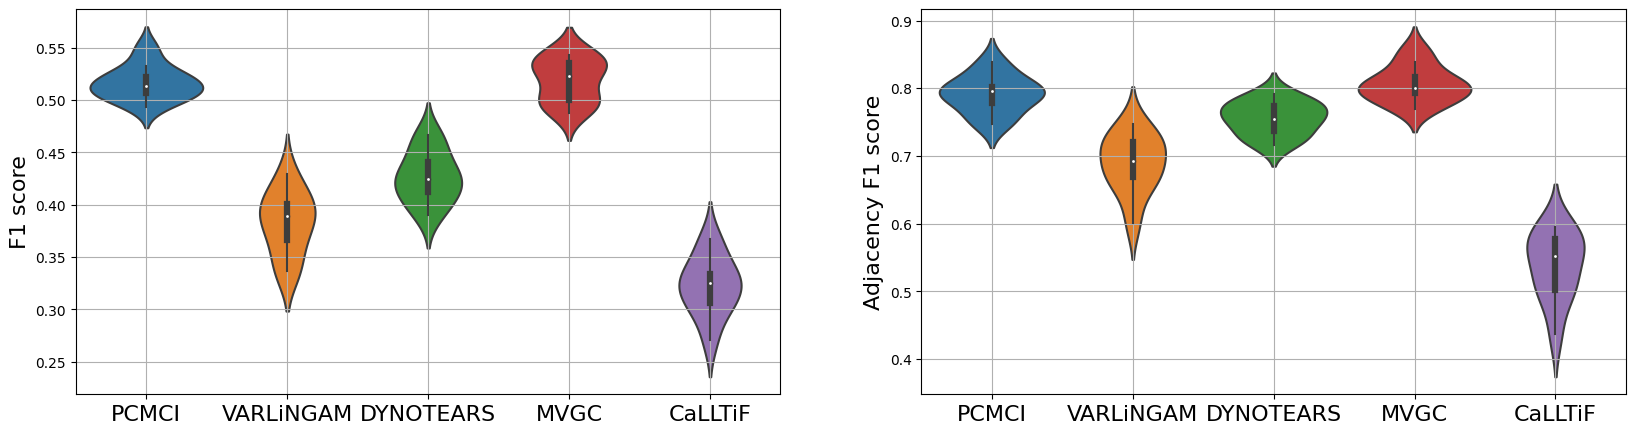

In [67]:
all_colors = ['blue', 'orange', 'green', 'red', 'gray']
labels = ['PCMCI', 'VARLiNGAM','DYNOTEARS','MVGC','CaLLTiF']

## Adjacency
plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,2,2)

adj_all_methods_F1_score_dist  = []
adj_all_methods_F1_score_dist. append(np.array(pcmci_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(varlingam_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(dynotears_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(mvgc_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(calltif_adj_F1_scores_at_best))


parts = sns.violinplot(adj_all_methods_F1_score_dist, points=40, widths=0.5, showextrema=True, showmedians=True,
                    bw_method='silverman')

ax1.set_xticklabels(labels,fontsize = 16)

plt.ylabel('Adjacency F1 score',fontsize = 16)
plt.grid()


## Orientation
ax2= plt.subplot(1,2,1)

ori_all_methods_F1_score_dist  = []
ori_all_methods_F1_score_dist. append(np.array(pcmci_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(varlingam_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(dynotears_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(mvgc_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(calltif_ori_F1_scores_at_best))

parts = sns.violinplot(ori_all_methods_F1_score_dist, points=40, widths=0.5, showextrema=True, showmedians=True,
                    bw_method='silverman')

ax2.set_xticklabels(labels,fontsize = 16)

plt.ylabel('F1 score',fontsize = 16)
plt.grid()

## F1 score

/home/fahimeh/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/fahimeh/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


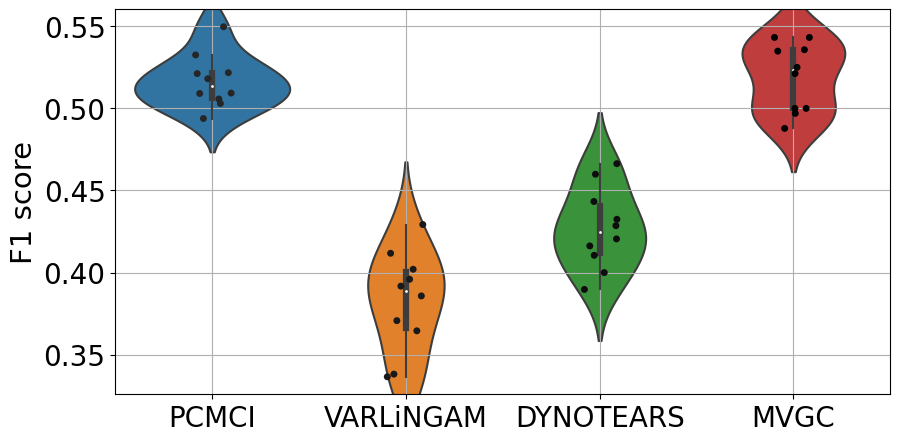

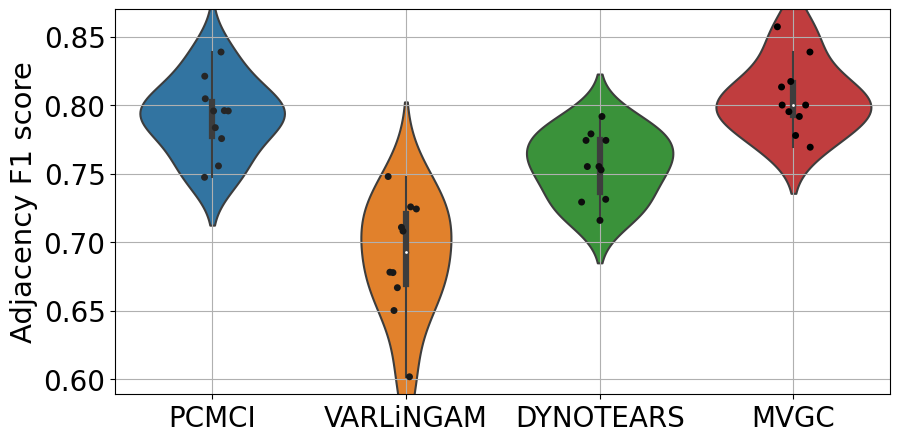

In [68]:
labels = ['PCMCI', 'VARLiNGAM','DYNOTEARS','MVGC']

## Adjacency

adj_all_methods_F1_score_dist  = []
adj_all_methods_F1_score_dist. append(np.array(pcmci_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(varlingam_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(dynotears_adj_F1_scores_at_best))
adj_all_methods_F1_score_dist. append(np.array(mvgc_adj_F1_scores_at_best))
# adj_all_methods_F1_score_dist. append(np.array(calltif_adj_F1_scores_at_best))

ori_all_methods_F1_score_dist  = []
ori_all_methods_F1_score_dist. append(np.array(pcmci_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(varlingam_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(dynotears_ori_F1_scores_at_best))
ori_all_methods_F1_score_dist. append(np.array(mvgc_ori_F1_scores_at_best))
# ori_all_methods_F1_score_dist. append(np.array(calltif_ori_F1_scores_at_best))

plt.figure(figsize = (10,5))
ax = plt.subplot()
parts = sns.violinplot(ori_all_methods_F1_score_dist)
sns.stripplot(ori_all_methods_F1_score_dist, color="black")
ax.set_xticklabels(labels,fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('F1 score',fontsize = 21)
plt.grid()

plt.figure(figsize = (10,5))
ax = plt.subplot()
parts = sns.violinplot(adj_all_methods_F1_score_dist)
sns.stripplot(adj_all_methods_F1_score_dist, color="black")
ax.set_xticklabels(labels,fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Adjacency F1 score',fontsize = 21)
plt.grid()


## Precision

/home/fahimeh/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/fahimeh/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


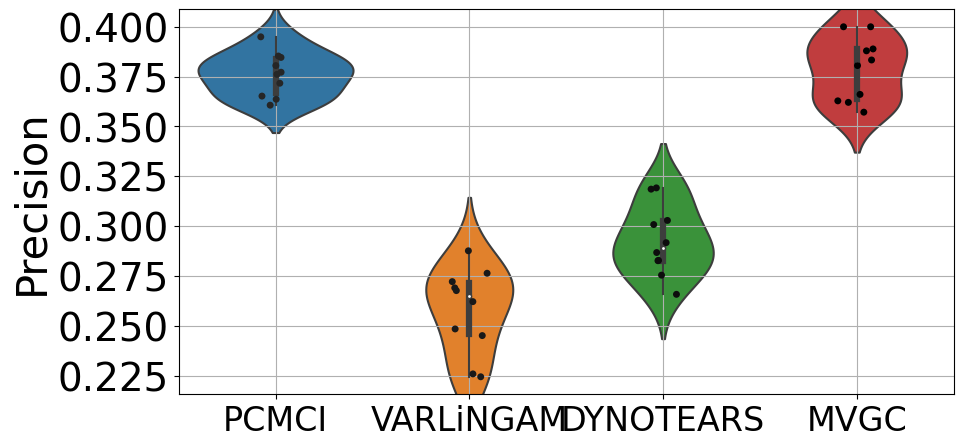

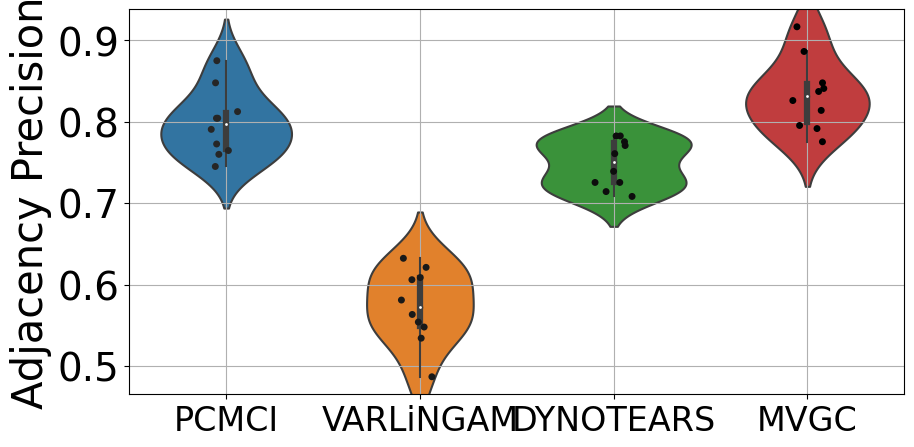

In [69]:
labels = ['PCMCI', 'VARLiNGAM','DYNOTEARS','MVGC']

## Adjacency

adj_all_methods_Precision_dist  = []
adj_all_methods_Precision_dist. append(np.array(pcmci_adj_Precision_at_best))
adj_all_methods_Precision_dist. append(np.array(varlingam_adj_Precision_at_best))
adj_all_methods_Precision_dist. append(np.array(dynotears_adj_Precision_at_best))
adj_all_methods_Precision_dist. append(np.array(mvgc_adj_Precision_at_best))
# adj_all_methods_Precision_dist. append(np.array(calltif_adj_Precision_at_best))

ori_all_methods_Precision_dist  = []
ori_all_methods_Precision_dist. append(np.array(pcmci_ori_Precision_at_best))
ori_all_methods_Precision_dist. append(np.array(varlingam_ori_Precision_at_best))
ori_all_methods_Precision_dist. append(np.array(dynotears_ori_Precision_at_best))
ori_all_methods_Precision_dist. append(np.array(mvgc_ori_Precision_at_best))
# ori_all_methods_Precision_dist. append(np.array(calltif_ori_Precision_at_best))


plt.figure(figsize = (10,5))
ax = plt.subplot()
parts = sns.violinplot(ori_all_methods_Precision_dist)
sns.stripplot(ori_all_methods_Precision_dist, color="black")
ax.set_xticklabels(labels,fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.ylabel('Precision',fontsize = 20)

plt.figure(figsize = (10,5))
ax = plt.subplot()
parts = sns.violinplot(adj_all_methods_Precision_dist)
sns.stripplot(adj_all_methods_Precision_dist, color="black")
ax.set_xticklabels(labels,fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.ylabel('Adjacency Precision',fontsize = 20)


## Recall

/home/fahimeh/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/fahimeh/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


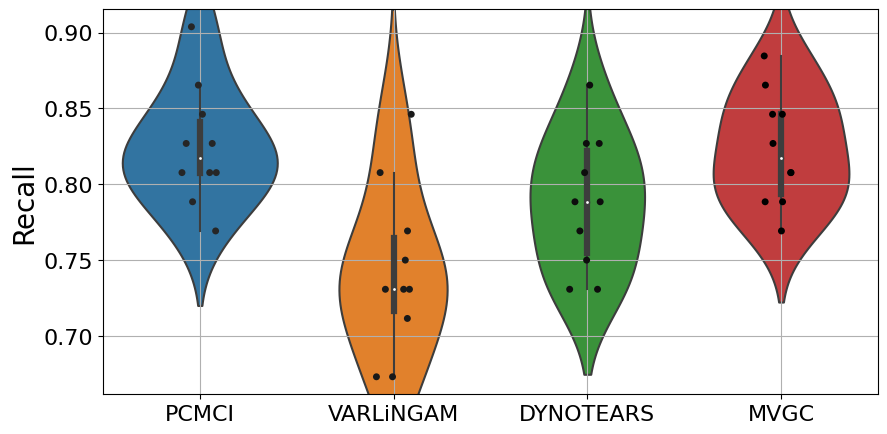

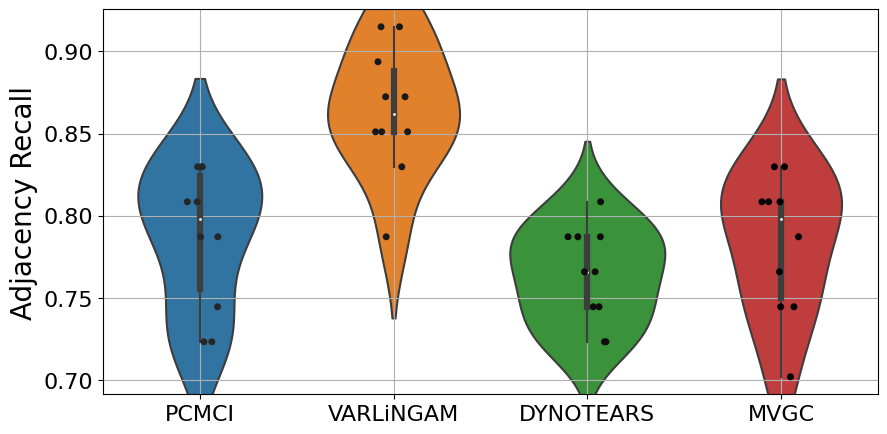

In [70]:
labels = ['PCMCI', 'VARLiNGAM','DYNOTEARS','MVGC']

## Adjacency

adj_all_methods_Recall_dist  = []
adj_all_methods_Recall_dist. append(np.array(pcmci_adj_Recall_at_best))
adj_all_methods_Recall_dist. append(np.array(varlingam_adj_Recall_at_best))
adj_all_methods_Recall_dist. append(np.array(dynotears_adj_Recall_at_best))
adj_all_methods_Recall_dist. append(np.array(mvgc_adj_Recall_at_best))
# adj_all_methods_Recall_dist. append(np.array(calltif_adj_Recall_at_best))

ori_all_methods_Recall_dist  = []
ori_all_methods_Recall_dist. append(np.array(pcmci_ori_Recall_at_best))
ori_all_methods_Recall_dist. append(np.array(varlingam_ori_Recall_at_best))
ori_all_methods_Recall_dist. append(np.array(dynotears_ori_Recall_at_best))
ori_all_methods_Recall_dist. append(np.array(mvgc_ori_Recall_at_best))
# ori_all_methods_Recall_dist. append(np.array(calltif_ori_Recall_at_best))

plt.figure(figsize = (10,5))
ax = plt.subplot()
parts = sns.violinplot(ori_all_methods_Recall_dist)
sns.stripplot(ori_all_methods_Recall_dist, color="black")
ax.set_xticklabels(labels,fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.ylabel('Recall',fontsize = 20)

plt.figure(figsize = (10,5))
ax = plt.subplot()
parts = sns.violinplot(adj_all_methods_Recall_dist)
sns.stripplot(adj_all_methods_Recall_dist, color="black")
ax.set_xticklabels(labels,fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.ylabel('Adjacency Recall',fontsize = 20)



### Execution Time Comparison

/tmp/ipykernel_3796263/3799070618.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, fontsize = 20)


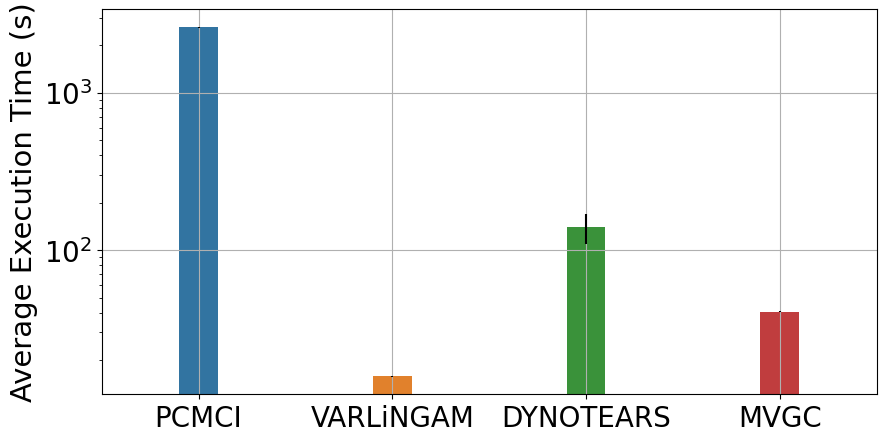

In [71]:
labels = ['PCMCI', 'VARLiNGAM','DYNOTEARS','MVGC']
palette = sns.color_palette()

# create some sample data
means = [np.mean(np.array(pcmci_execution_time_at_best)), np.mean(np.array(varlingam_execution_time_at_best)), np.mean(np.array(dynotears_execution_time_at_best)), np.mean(np.array(mvgc_execution_time_at_best))]
stds = [np.std(np.array(pcmci_execution_time_at_best)), np.std(np.array(varlingam_execution_time_at_best)), np.std(np.array(dynotears_execution_time_at_best)), np.std(np.array(mvgc_execution_time_at_best))]

# create a bar plot with error bars
plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.barplot(x=labels, y=means, yerr=stds, capsize=0.5, width= 0.2)

ax.set_xticks(np.arange(len(means)))
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(labels, fontsize = 20)
ax.set_ylabel('Average Execution Time (s)', fontsize = 21)
plt.yscale('log')
ax.grid()
